# Part - A

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from keras.applications import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Input

# Experiment - 1

In [56]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
x_train = x_train / 255
x_test = x_test / 255

### Build a model

In [28]:
# Initialize a sequential model
model = keras.Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay),
                 input_shape=x_train.shape[1:]))

# Add the second convolutional layer similar to the first
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay)))

# Add the first max pooling layer with pool size of 2x2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Add dropout layer with 0.2 dropout rate
model.add(layers.Dropout(rate=0.2))

# Add the third convolutional layer with 64 filters
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay)))

# Add the fourth and fifth convolutional layers with 128 filters
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay)))

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.3))


# Flatten the tensor output from the previous layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
# Add a fully connected layer with softmax activation function for outputting class probabilities
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                      

In [30]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, restore_best_weights=True, verbose=1)

history = model.fit(
        x_train,
        y_train,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/10
625/625 [==============================] - 9s 11ms/step - loss: 1.6447 - accuracy: 0.4059 - val_loss: 1.3256 - val_accuracy: 0.5360
Epoch 2/10
625/625 [==============================] - 7s 10ms/step - loss: 1.2381 - accuracy: 0.5645 - val_loss: 1.1087 - val_accuracy: 0.6166
Epoch 3/10
625/625 [==============================] - 7s 10ms/step - loss: 1.0468 - accuracy: 0.6367 - val_loss: 0.9677 - val_accuracy: 0.6740
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.9200 - accuracy: 0.6854 - val_loss: 0.8904 - val_accuracy: 0.6967
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.8197 - accuracy: 0.7226 - val_loss: 0.8229 - val_accuracy: 0.7264
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.7504 - accuracy: 0.7473 - val_loss: 0.7989 - val_accuracy: 0.7365
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6781 - accuracy: 0.7739 - val_loss: 0.7624 - val_accuracy: 0.7534

### Results

In [31]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(model)
with open("/content/PartA/Custom_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_1_results.csv", index=False)


print("Model summary and training results saved to CSV.")


Model summary and training results saved to CSV.


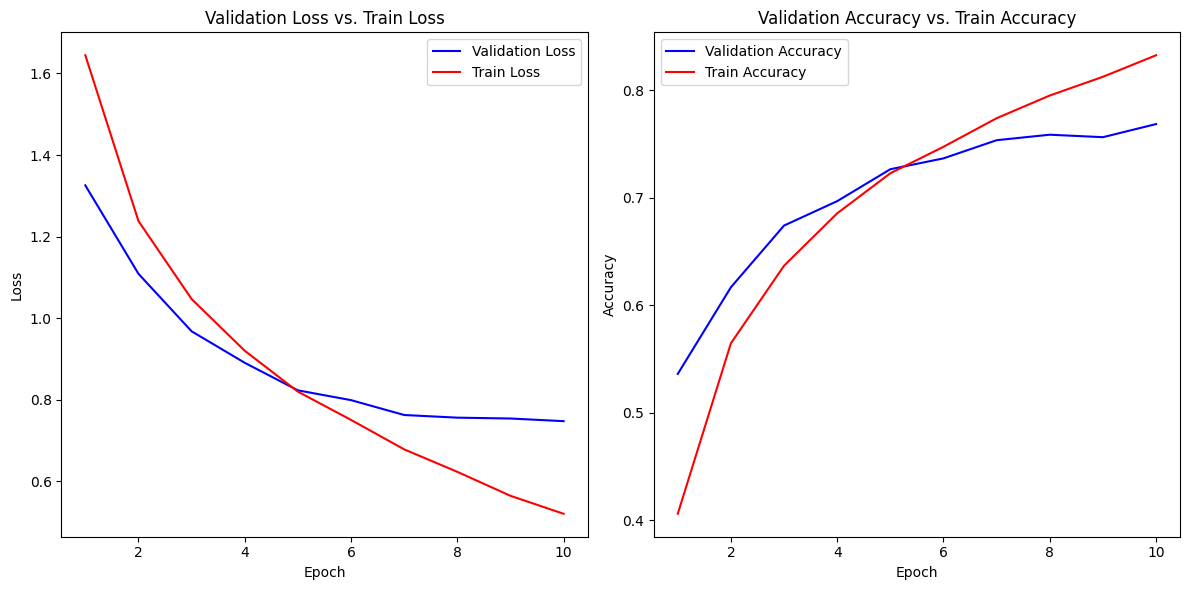

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Train Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_1_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()




In [33]:
model.save("/content/PartA/custom_model.keras")

# Experiment - 2

### **Dataset - CIFAR 10**

### VGG Model

In [34]:
vgg19_model = VGG19(include_top = False, weights='imagenet', input_shape=(224,224,3))

for layer in vgg19_model.layers:
  layer.trainable = False

vgg19_model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [35]:
# define new empty model
new_model = keras.Sequential()

new_model.add(layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))

new_model.add(vgg19_model)

new_model.add(layers.Flatten())

# add dropout layer and new output layer
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dropout(0.3))

new_model.add(layers.Dense(128, activation='relu'))
new_model.add(layers.Dropout(0.3))

new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dropout(0.3))


new_model.add(layers.Dense(10, activation='softmax'))

In [36]:
new_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [37]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, verbose=1)

history = new_model.fit(
        x_train,
        y_train,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = new_model.evaluate(x_test, y_test, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/10
625/625 [==============================] - 239s 363ms/step - loss: 2.0566 - accuracy: 0.2014 - val_loss: 1.7008 - val_accuracy: 0.3159
Epoch 2/10
625/625 [==============================] - 221s 354ms/step - loss: 1.8775 - accuracy: 0.2524 - val_loss: 1.6641 - val_accuracy: 0.3631
Epoch 3/10
625/625 [==============================] - 221s 354ms/step - loss: 1.8233 - accuracy: 0.2750 - val_loss: 1.5733 - val_accuracy: 0.3900
Epoch 4/10
625/625 [==============================] - 221s 354ms/step - loss: 1.7869 - accuracy: 0.2913 - val_loss: 1.5190 - val_accuracy: 0.4205
Epoch 5/10
625/625 [==============================] - 221s 354ms/step - loss: 1.7733 - accuracy: 0.2977 - val_loss: 1.6374 - val_accuracy: 0.3811
Epoch 6/10
625/625 [==============================] - 221s 354ms/step - loss: 1.7463 - accuracy: 0.3102 - val_loss: 1.4950 - val_accuracy: 0.4237
Epoch 7/10
625/625 [==============================] - 221s 354ms/step - loss: 1.7321 - accuracy: 0.3137 - val_loss: 1.5556 -

In [38]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/CIFAR10_VGG_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_2.1_results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/CIFAR10_VGG_Model.keras")

Model summary and training results saved to CSV.


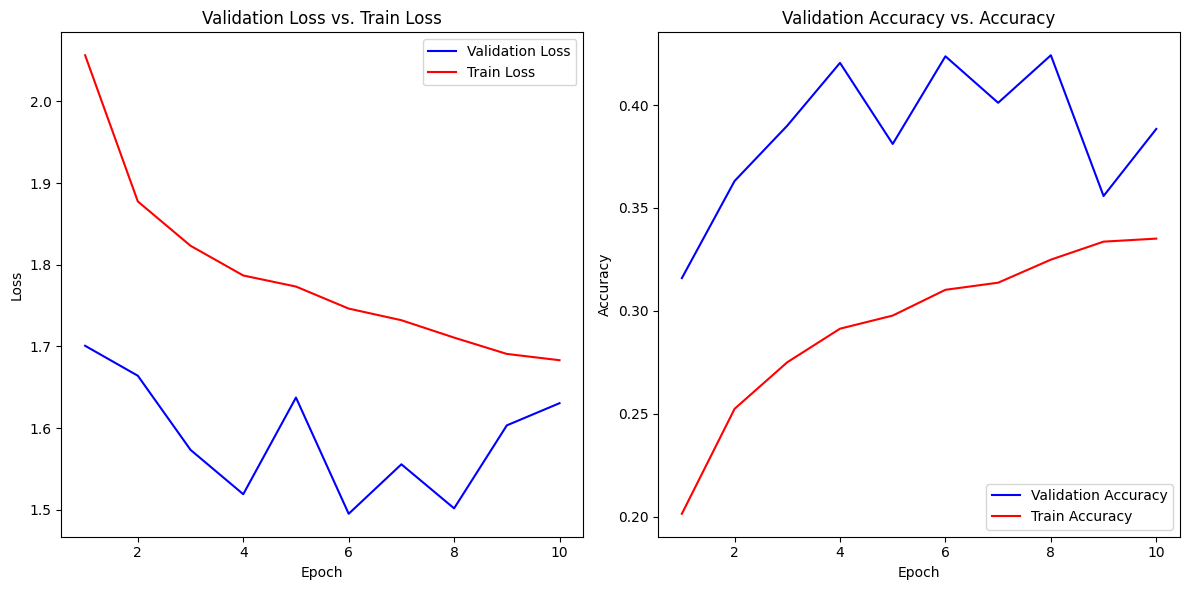

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_2.1_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### RESNET model

In [57]:
resnet_model = ResNet50(include_top = False, weights = 'imagenet',input_shape = (224,224,3))

for layer in resnet_model.layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

resnet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_9[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [63]:
model=keras.Sequential()
model.add(layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [64]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [67]:
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, verbose=1)

history = model.fit(
        x_train,
        y_train,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = new_model.evaluate(x_test, y_test, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

In [ ]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/CIFAR10_RESNET_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_2.2_results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/CIFAR10_RESNET_Model.keras")

Model summary and training results saved to CSV.


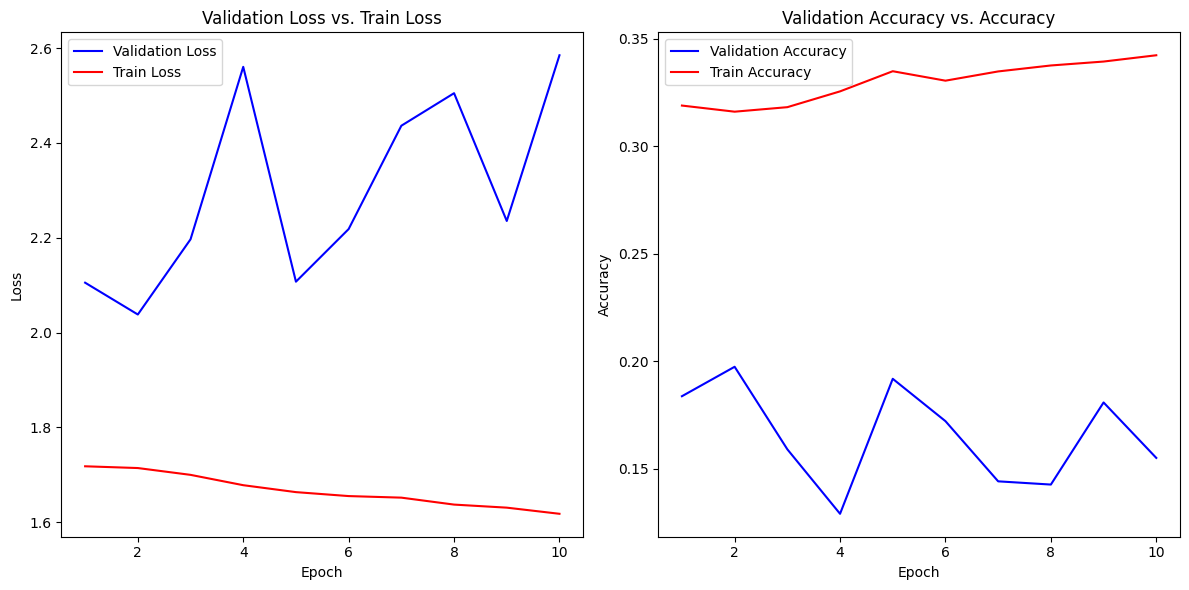

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_2.2_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### **Dataset - CIFAR 100**

In [ ]:
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

169001437/169001437 [==============================] - 12s 0us/step


In [ ]:
classes = [
    "apple",
    "aquarium_fish",
    "baby",
    "bear",
    "beaver",
    "bed",
    "bee",
    "beetle",
    "bicycle",
    "bottle",
    "bowl",
    "boy",
    "bridge",
    "bus",
    "butterfly",
    "camel",
    "can",
    "castle",
    "caterpillar",
    "cattle",
    "chair",
    "chimpanzee",
    "clock",
    "cloud",
    "cockroach",
    "couch",
    "crab",
    "crocodile",
    "cup",
    "dinosaur",
    "dolphin",
    "elephant",
    "flatfish",
    "forest",
    "fox",
    "girl",
    "hamster",
    "house",
    "kangaroo",
    "keyboard",
    "lamp",
    "lawn_mower",
    "leopard",
    "lion",
    "lizard",
    "lobster",
    "man",
    "maple_tree",
    "motorcycle",
    "mountain",
    "mouse",
    "mushroom",
    "oak_tree",
    "orange",
    "orchid",
    "otter",
    "palm_tree",
    "pear",
    "pickup_truck",
    "pine_tree",
    "plain",
    "plate",
    "poppy",
    "porcupine",
    "possum",
    "rabbit",
    "raccoon",
    "ray",
    "road",
    "rocket",
    "rose",
    "sea",
    "seal",
    "shark",
    "shrew",
    "skunk",
    "skyscraper",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "streetcar",
    "sunflower",
    "sweet_pepper",
    "table",
    "tank",
    "telephone",
    "television",
    "tiger",
    "tractor",
    "train",
    "trout",
    "tulip",
    "turtle",
    "wardrobe",
    "whale",
    "willow_tree",
    "wolf",
    "woman",
    "worm"
]

# You can now use this list to reference the class names in CIFAR-100


In [ ]:
NUM_CLASSES = 100
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

### Custom Model

In [ ]:
# Load the pre-trained Model 3
base_model = keras.models.load_model("/content/PartA/custom_model.keras")
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                        

In [ ]:

# Set the weight decay value for L2 regularization
weight_decay = 0.0001


new_model = keras.Sequential()

# Add the first convolutional layer with 32 filters of size 3x3
#new_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(weight_decay),input_shape=x_train.shape[1:]))

# add all layers except output from VGG19 to new model
for layer in base_model.layers[:-1]:
  new_model.add(layer)

# freeze all weights
for layer in new_model.layers:
  layer.trainable = False

# Add new classification layers on top of the frozen base model
new_model.add(layers.Dense(256, activation="relu"))  # Example additional dense layer
new_model.add(layers.Dropout(0.5))  # Additional dropout to prevent overfitting
new_model.add(layers.Dense(100, activation="softmax"))  # New output layer with softmax for classification

for layer in new_model.layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.trainable = False  # This will ensure no updates to BatchNorm statistics
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                      

In [ ]:
# Recompile the model with the new classification layers
new_model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Keep the original learning rate or adjust as needed
    metrics=["accuracy"],
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, verbose=1)

history = new_model.fit(
        x_train,
        y_train,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = new_model.evaluate(x_test, y_test, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 34.9698 - accuracy: 0.0127 - val_loss: 4.7547 - val_accuracy: 0.0111
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 4.7465 - accuracy: 0.0098 - val_loss: 4.6804 - val_accuracy: 0.0089
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 4.6835 - accuracy: 0.0096 - val_loss: 4.6646 - val_accuracy: 0.0082
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 4.6656 - accuracy: 0.0094 - val_loss: 4.6598 - val_accuracy: 0.0082
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 4.6620 - accuracy: 0.0097 - val_loss: 4.6575 - val_accuracy: 0.0082
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 4.6561 - accuracy: 0.0102 - val_loss: 4.6598 - val_accuracy: 0.0082
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 4.6599 - accuracy: 0.0096 - val_loss: 4.6590 - val_accuracy: 0.0081
Epoch

In [ ]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/CIFAR100_Custom_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_2.3_results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/CIFAR100_Custom_Model.keras")

Model summary and training results saved to CSV.


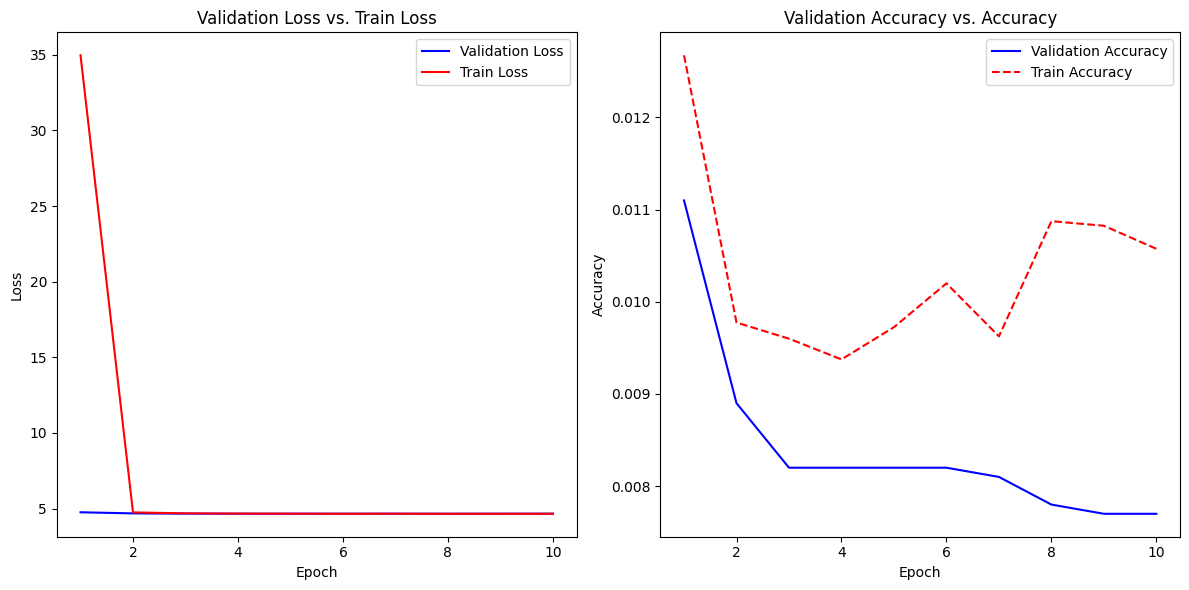

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='--', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_2.3_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### VGG Model

In [ ]:
vgg19_model = VGG19(include_top = False, weights='imagenet', input_shape=(224,224,3))

for layer in vgg19_model.layers:
  layer.trainable = False

vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# define new empty model
new_model = keras.Sequential()

new_model.add(layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))

new_model.add(vgg19_model)

new_model.add(layers.Flatten())

# add dropout layer and new output layer
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dropout(0.3))

new_model.add(layers.Dense(128, activation='relu'))
new_model.add(layers.Dropout(0.3))

new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dropout(0.3))


new_model.add(layers.Dense(100, activation='softmax'))


In [ ]:
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, verbose=1)

history = new_model.fit(
        x_train,
        y_train,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = new_model.evaluate(x_test, y_test, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/10
625/625 [==============================] - 266s 423ms/step - loss: 4.5899 - accuracy: 0.0415 - val_loss: 4.1212 - val_accuracy: 0.0996
Epoch 2/10
625/625 [==============================] - 264s 423ms/step - loss: 4.1832 - accuracy: 0.0770 - val_loss: 3.8339 - val_accuracy: 0.1455
Epoch 3/10
625/625 [==============================] - 264s 423ms/step - loss: 3.8823 - accuracy: 0.1070 - val_loss: 3.4421 - val_accuracy: 0.1798
Epoch 4/10
625/625 [==============================] - 264s 422ms/step - loss: 3.6128 - accuracy: 0.1271 - val_loss: 3.2163 - val_accuracy: 0.1822
Epoch 5/10
625/625 [==============================] - 264s 422ms/step - loss: 3.4629 - accuracy: 0.1394 - val_loss: 3.1176 - val_accuracy: 0.2179
Epoch 6/10
625/625 [==============================] - 264s 422ms/step - loss: 3.3684 - accuracy: 0.1534 - val_loss: 3.0646 - val_accuracy: 0.2218
Epoch 7/10
625/625 [==============================] - 264s 423ms/step - loss: 3.2758 - accuracy: 0.1616 - val_loss: 2.9882 -

In [ ]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/CIFAR100_VGG_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_2.4_results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/CIFAR100_VGG_Model.keras")

Model summary and training results saved to CSV.


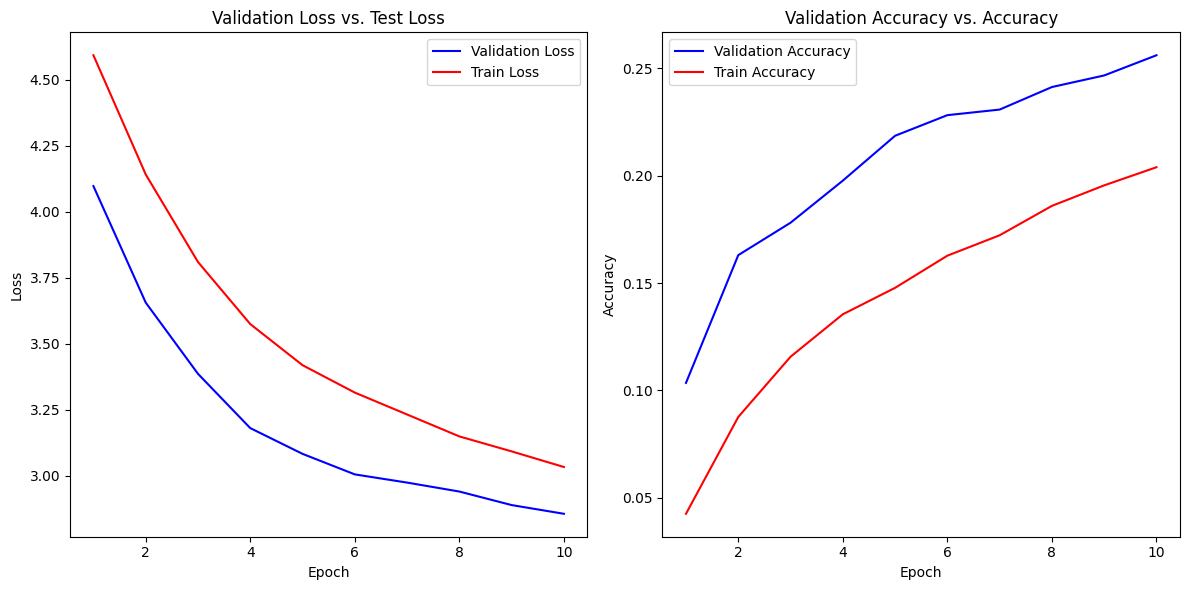

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_2.4_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### RESNET Model

In [ ]:
resnet_model = ResNet50(include_top = False, weights = 'imagenet',input_shape = (224,224,3))

for layer in resnet_model.layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model=keras.Sequential()
model.add(layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [ ]:
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, verbose=1)

history = new_model.fit(
        x_train,
        y_train,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = new_model.evaluate(x_test, y_test, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/10
625/625 [==============================] - 257s 411ms/step - loss: 2.9750 - accuracy: 0.2112 - val_loss: 2.7965 - val_accuracy: 0.2651
Epoch 2/10
625/625 [==============================] - 255s 408ms/step - loss: 2.9348 - accuracy: 0.2184 - val_loss: 2.8007 - val_accuracy: 0.2723
Epoch 3/10
625/625 [==============================] - 255s 408ms/step - loss: 2.8929 - accuracy: 0.2273 - val_loss: 2.7711 - val_accuracy: 0.2735
Epoch 4/10
625/625 [==============================] - 255s 408ms/step - loss: 2.8393 - accuracy: 0.2356 - val_loss: 2.7622 - val_accuracy: 0.2695
Epoch 5/10
625/625 [==============================] - 255s 408ms/step - loss: 2.8182 - accuracy: 0.2410 - val_loss: 2.7441 - val_accuracy: 0.2764
Epoch 6/10
625/625 [==============================] - 255s 409ms/step - loss: 2.7893 - accuracy: 0.2419 - val_loss: 2.7363 - val_accuracy: 0.2811
Epoch 7/10
625/625 [==============================] - 255s 408ms/step - loss: 2.7606 - accuracy: 0.2468 - val_loss: 2.7320 -

In [ ]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/CIFAR100_RESNET_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_2.5_results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/CIFAR100_RESNET_Model.keras")

Model summary and training results saved to CSV.


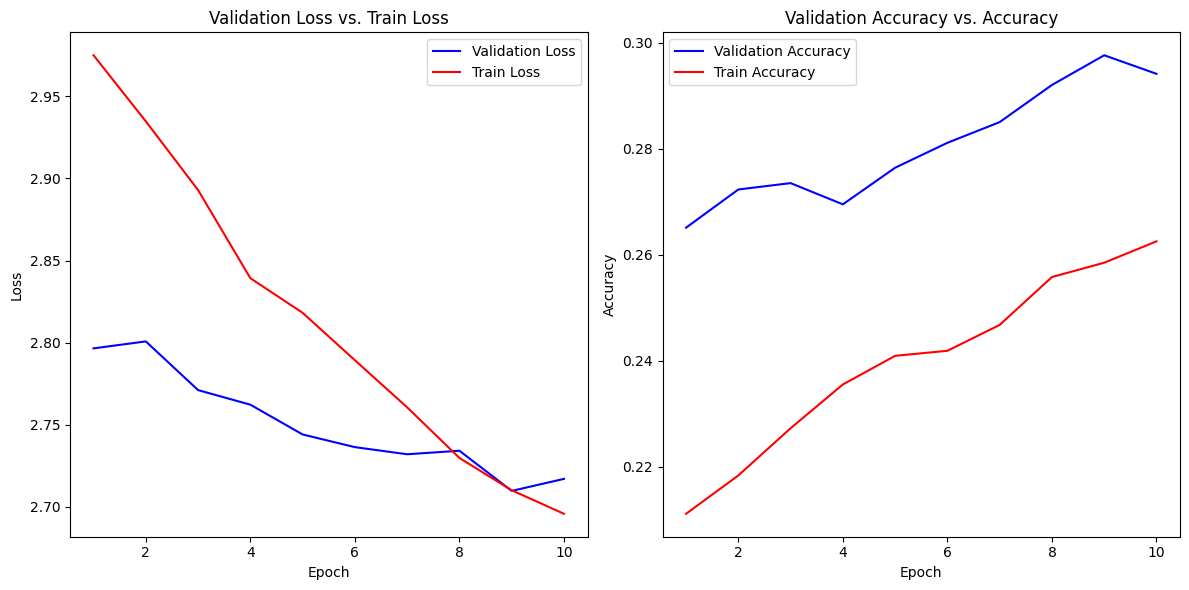

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_2.5_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

### **Dataset - Tiny ImageNet**

In [42]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

fatal: destination path 'IMagenet' already exists and is not an empty directory.
test  train  val  wnids.txt  words.txt


In [43]:
# First, install Pillow if you haven't already
!pip install Pillow

In [44]:
import time
import numpy as np
from PIL import Image
import os

path = 'IMagenet/tiny-imagenet-200/'

def get_id_dictionary():
    id_dict = {}
    with open(os.path.join(path, 'wnids.txt'), 'r') as file:
        for i, line in enumerate(file):
            id_dict[line.strip()] = i
    return id_dict

def get_class_to_id_dict():
    id_dict = get_id_dictionary()
    all_classes = {}
    result = {}
    with open(os.path.join(path, 'words.txt'), 'r') as file:
        for i, line in enumerate(file):
            n_id, word = line.split('\t')[:2]
            all_classes[n_id] = word
    for key, value in id_dict.items():
        result[value] = (key, all_classes[key])
    return result

def get_data(id_dict):
    print('Starting loading data')
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    t = time.time()

    # Load training data
    for key, value in id_dict.items():
        for i in range(500):
            img_path = os.path.join(path, 'train', key, 'images', f'{key}_{i}.JPEG')
            img = Image.open(img_path).convert('RGB')  # Read image and convert to RGB
            train_data.append(np.array(img))
        train_labels_ = np.zeros((500, 200))  # Create an array of zeros for labels
        train_labels_[:, value] = 1  # Set corresponding label to 1
        train_labels += train_labels_.tolist()

    # Load test data
    with open(os.path.join(path, 'val', 'val_annotations.txt'), 'r') as file:
        for line in file:
            img_name, class_id = line.split('\t')[:2]
            img_path = os.path.join(path, 'val', 'images', img_name)
            img = Image.open(img_path).convert('RGB')  # Read image and convert to RGB
            test_data.append(np.array(img))
            test_labels_ = np.zeros((1, 200))  # Create an array of zeros for labels
            test_labels_[0, id_dict[class_id]] = 1
            test_labels += test_labels_.tolist()

    print('Finished loading data in', time.time() - t, 'seconds')

    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)

train_data, train_labels, test_data, test_labels = get_data(get_id_dictionary())

print("Train data shape:", train_data.shape)
print("Train label shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test label shape:", test_labels.shape)


Starting loading data
Finished loading data in 23.944219827651978 seconds
Train data shape: (100000, 64, 64, 3)
Train label shape: (100000, 200)
Test data shape: (10000, 64, 64, 3)
Test label shape: (10000, 200)


### Custom Model

In [46]:
# Load the pre-trained model (e.g., from Experiment 1)
model = keras.models.load_model("/content/PartA/custom_model.keras")

model.summary()

# Freeze the model to change its structure
model.trainable = False  # Freeze the base model to change the architecture

# Adjust the input shape to 64x64
input_layer = layers.Input(shape=(64, 64, 3))
x = input_layer

# Adjusted Convolutional Layers
x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # From 64x64 to 32x32
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # From 32x32 to 16x16
x = layers.Dropout(0.25)(x)

# Adjust Flatten Layer and Dense Layers
x = layers.Flatten()(x)  # Flatten the output for dense layers
x = layers.Dense(512, activation="relu")(x)  # Adjusted dense layer with 512 units
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# Adjust the Output Layer for 200 Classes (Tiny ImageNet)
x = layers.Dense(200, activation="softmax")(x)

# Create the new model with the adjusted structure
new_model = keras.Model(inputs=input_layer, outputs=x)

# Re-compile with the correct optimizer and loss function for fine-tuning
new_model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    metrics=["accuracy"],
)

new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                      

In [47]:
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=40, verbose=1)

history = new_model.fit(
        train_data,
        train_labels,
        epochs=10,  # Shorter epochs for quicker testing
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

test_loss, test_accuracy = new_model.evaluate(test_data, test_labels, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/10
1250/1250 [==============================] - 157s 124ms/step - loss: 5.5464 - accuracy: 0.0061 - val_loss: 9.6494 - val_accuracy: 0.0000e+00
Epoch 2/10
1250/1250 [==============================] - 154s 123ms/step - loss: 5.0853 - accuracy: 0.0065 - val_loss: 10.4122 - val_accuracy: 0.0000e+00
Epoch 3/10
1250/1250 [==============================] - 154s 123ms/step - loss: 5.0825 - accuracy: 0.0063 - val_loss: 10.8298 - val_accuracy: 0.0000e+00
Epoch 4/10
1250/1250 [==============================] - 153s 123ms/step - loss: 5.0822 - accuracy: 0.0061 - val_loss: 11.0095 - val_accuracy: 0.0000e+00
Epoch 5/10
1250/1250 [==============================] - 153s 122ms/step - loss: 5.0782 - accuracy: 0.0061 - val_loss: 11.7719 - val_accuracy: 0.0000e+00
Epoch 6/10
1250/1250 [==============================] - 153s 122ms/step - loss: 5.0777 - accuracy: 0.0064 - val_loss: 11.9751 - val_accuracy: 0.0000e+00
Epoch 7/10
1250/1250 [==============================] - 153s 122ms/step - loss: 5.0

In [49]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/TinyImageNet_Custom_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_2.6_results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/TinyImageNet_Custom_Model.keras")

Model summary and training results saved to CSV.


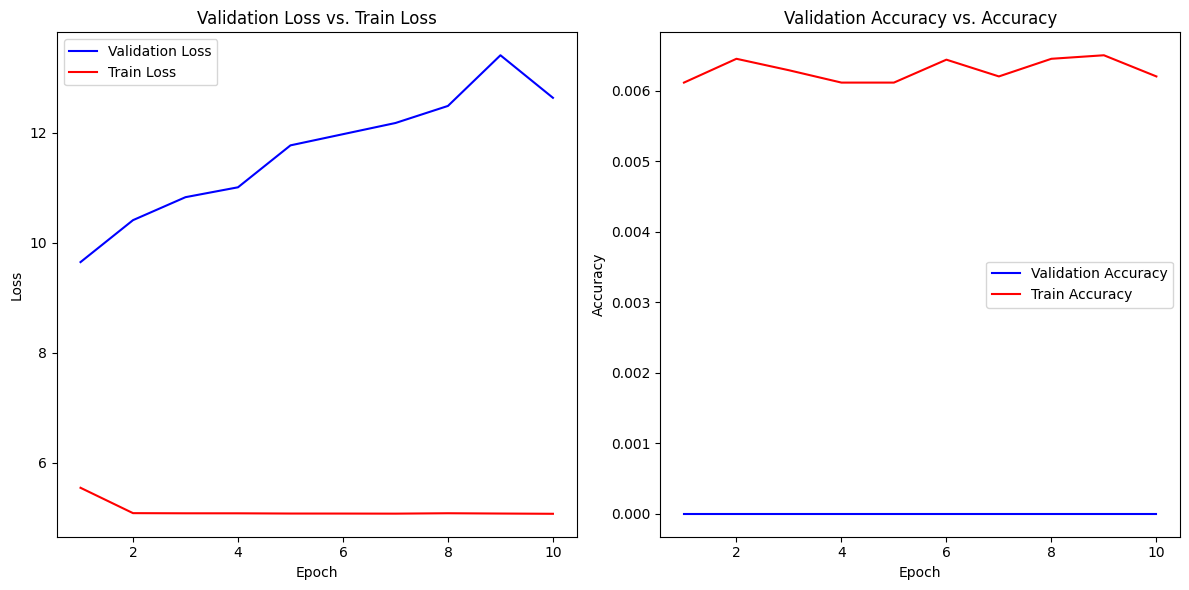

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_2.6_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

# Experiment - 3

In [51]:
# Load the pre-trained model (e.g., from Experiment 1)
model = keras.models.load_model("/content/PartA/custom_model.keras")

model.summary()

# Freeze the model to change its structure
model.trainable = False  # Freeze the base model to change the architecture

# Adjust the input shape to 64x64
input_layer = layers.Input(shape=(64, 64, 3))
x = input_layer

# Adjusted Convolutional Layers
x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # From 64x64 to 32x32
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # From 32x32 to 16x16
x = layers.Dropout(0.25)(x)

# Adjust Flatten Layer and Dense Layers
x = layers.Flatten()(x)  # Flatten the output for dense layers
x = layers.Dense(512, activation="relu")(x)  # Adjusted dense layer with 512 units
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# Adjust the Output Layer for 200 Classes (Tiny ImageNet)
x = layers.Dense(200, activation="softmax")(x)

# Create the new model with the adjusted structure
fine_tuned_model = keras.Model(inputs=input_layer, outputs=x)

# Re-compile with the correct optimizer and loss function for fine-tuning
fine_tuned_model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    metrics=["accuracy"],
)

# Unfreeze the model for fine-tuning
fine_tuned_model.trainable = True

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                      

In [52]:
# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Training the model with Tiny ImageNet data
history = fine_tuned_model.fit(
    train_data,  # Placeholder for the Tiny ImageNet training data
    train_labels,  # Placeholder for the Tiny ImageNet training labels
    epochs=1,  # Adjust as needed
    batch_size=64,
    validation_split=0.2,  # Validation to monitor overfitting
    callbacks=[early_stopping],
    verbose=1,
)

1250/1250 [==============================] - 159s 126ms/step - loss: 5.5755 - accuracy: 0.0063 - val_loss: 5.5271 - val_accuracy: 0.0000e+00


In [53]:
# Evaluate the model on the Tiny ImageNet test set
test_loss, test_accuracy = fine_tuned_model.evaluate(
    test_data,  # Placeholder for the Tiny ImageNet test data
    test_labels,  # Placeholder for the Tiny ImageNet test labels
    verbose=1,
)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 5.3047 - accuracy: 0.0050
Test loss: 5.30469274520874
Test accuracy: 0.004999999888241291


In [54]:
def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary = stream.getvalue()
    stream.close()
    return summary

# Create a DataFrame to store the results
results = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Train Loss': history.history['loss'],
    'Train Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Test Loss': [test_loss] * len(history.history['loss']),  # Repeat for each epoch
    'Test Accuracy': [test_accuracy] * len(history.history['accuracy'])  # Repeat for each epoch
}

df = pd.DataFrame(results)

model_summary = get_model_summary(new_model)
with open("/content/PartA/Exp_3_fine_tuned_Model.txt", "w") as f:
    f.write(model_summary)

# Save training, validation, and test data to a CSV
df.to_csv("/content/PartA/Exp_3__results.csv", index=False)

print("Model summary and training results saved to CSV.")

new_model.save("/content/PartA/Exp_3_fine_tuned_Model.keras")

Model summary and training results saved to CSV.


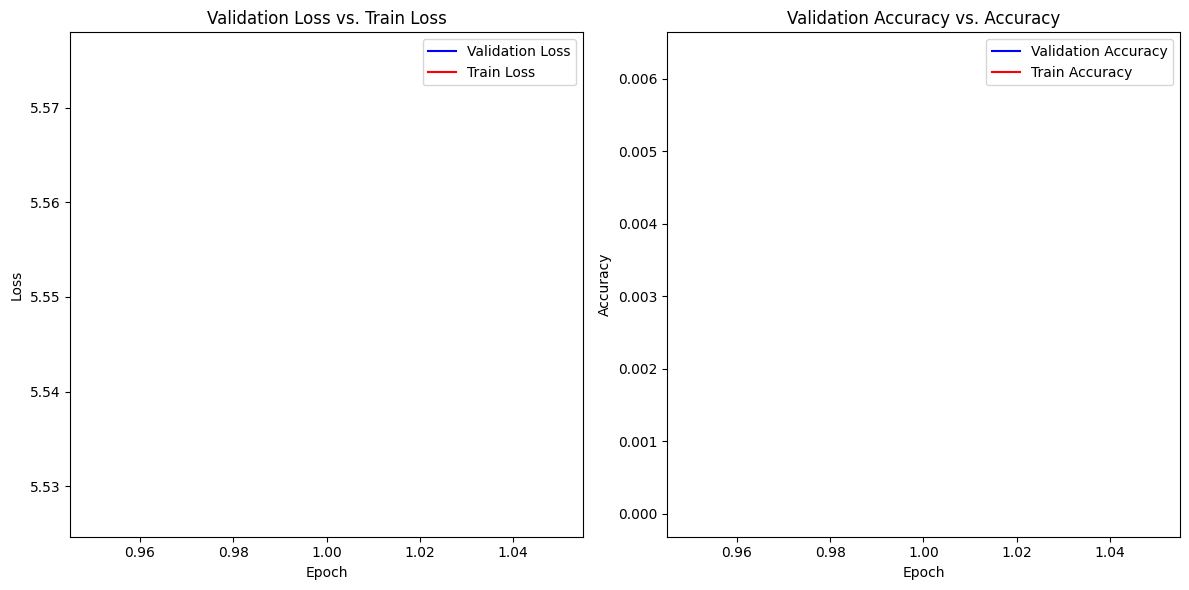

In [55]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Train Loss')
plt.legend()

plt.subplot(1, 2, 2)  # Second plot
plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy', linestyle='-', color='b')
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy', linestyle='-', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Accuracy')
plt.legend()

plt.savefig("/content/PartA/Exp_3_loss_accuracy_plots.jpg")


plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

# Experiment - 4

In [83]:
fine_tuned_model = keras.models.load_model("/content/PartA/Exp_3_fine_tuned_model.keras")

In [84]:
new_model = keras.Sequential()

new_model.add(fine_tuned_model)


In [85]:
new_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    metrics=["accuracy"],
)

In [86]:
from skimage.transform import resize
x_test_resized = []
for image in x_test:
    resized_image = resize(image, (64, 64))
    x_test_resized.append(resized_image)
x_test_resized = np.array(x_test_resized)


In [87]:
test_loss, test_accuracy = new_model.evaluate(x_test_resized, y_test, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 5.2599 - accuracy: 0.0000e+00
Test loss: 5.259850978851318
Test accuracy: 0.0


In [88]:
import pandas as pd

# Create a DataFrame to store results
results = {
    "test_loss": [test_loss],
    "test_accuracy": [test_accuracy],
}

df = pd.DataFrame(results)

# Save results to a CSV file
df.to_csv("experiment_4_results.csv", index=False)

print("Results saved to experiment_4_results.csv")

Results saved to experiment_4_results.csv


# Part - B

# Experiment - 1

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/Aquarium Combined/data.yaml'

Model - YOLO v8

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [5]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [6]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 367MB/s]


In [7]:
# Train the model using the specified dataset and configuration
train_results = model.train(
    data=dataset_path,  # Path to your YAML dataset configuration
    epochs=10,  # Number of training epochs (adjust as needed)
    imgsz=640,  # Image size
    batch=16,  # Batch size
    name='aquarium_model',  # Name for this training run
    verbose=True  # Show detailed output during training
)

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Aquarium Combined/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=aquarium_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 44.6MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 182MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Aquarium Combined/train/labels.cache... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Aquarium Combined/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to runs/detect/aquarium_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/aquarium_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.17G      1.487      3.093      1.335        134        640: 100%|██████████| 28/28 [00:18<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        127        909      0.387      0.291      0.279      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.16G      1.471      2.089      1.298        109        640: 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        127        909      0.405      0.425      0.373      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.15G      1.471      1.816      1.347        112        640: 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        127        909      0.423      0.478      0.379      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.05G      1.475      1.744      1.344         90        640: 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        127        909      0.577      0.395      0.396      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         7G      1.434      1.506      1.319        100        640: 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        909      0.627      0.471      0.501      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.06G      1.401      1.419      1.293        133        640: 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        909      0.556      0.558      0.546      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         7G       1.34      1.247       1.27        135        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        127        909      0.634      0.595      0.621      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.16G      1.328      1.162       1.25         87        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        127        909      0.673      0.639       0.66      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.08G      1.265      1.031      1.216        141        640: 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        127        909        0.8      0.619      0.713      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.07G       1.25     0.9848      1.188        137        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        127        909      0.727      0.724       0.73      0.452



10 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/aquarium_model/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/aquarium_model/weights/best.pt, 52.0MB

Validating runs/detect/aquarium_model/weights/best.pt...
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all        127        909      0.727      0.725       0.73      0.454
                  fish        127        459      0.818      0.752      0.837      0.493
             jellyfish        127        155      0.782      0.923      0.909      0.505
               penguin        127        104      0.648      0.731      0.672      0.332
                puffin        127         74      0.594      0.486       0.47       0.22
                 shark        127         57      0.711      0.596      0.616      0.407
              starfish        127         27      0.801      0.746      0.771        0.6
              stingray        127         33      0.735       0.84      0.833      0.618
Speed: 0.2ms preprocess, 8.5ms inference, 0.1ms loss, 19.8ms postprocess per image
Results saved to runs/detect/aquarium_model


In [8]:
# Save the best model to Google Drive
best_model = YOLO('/content/runs/detect/aquarium_model/weights/best.pt')

In [9]:
val_results = best_model.val(data='/content/drive/MyDrive/Aquarium Combined/data.yaml', batch=16)

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/Aquarium Combined/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]


                   all        127        909      0.722      0.731      0.729      0.451
                  fish        127        459      0.808      0.752      0.837      0.494
             jellyfish        127        155      0.787      0.916      0.913      0.505
               penguin        127        104      0.643      0.731      0.672      0.333
                puffin        127         74      0.589      0.486      0.467      0.212
                 shark        127         57      0.706      0.632      0.615      0.405
              starfish        127         27      0.803      0.753      0.771      0.594
              stingray        127         33      0.717      0.845       0.83      0.616
Speed: 0.7ms preprocess, 24.5ms inference, 0.1ms loss, 23.7ms postprocess per image
Results saved to runs/detect/val


In [16]:
# Extract key metrics
precision = val_results.results_dict.get('metrics/precision(B)', None)  # Retrieve precision
recall = val_results.results_dict.get('metrics/recall(B)', None)  # Retrieve recall
map50 = val_results.results_dict.get('metrics/mAP50(B)', None)  # Retrieve mAP50
map5095 = val_results.results_dict.get('metrics/mAP50-95(B)', None)  # Retrieve mAP50-95

In [17]:
# Create a DataFrame with the extracted metrics
validation_metrics = {
    'Metric': ['Precision', 'Recall', 'mAP50', 'mAP50-95'],
    'Value': [precision, recall, map50, map5095]  # Add extracted values
}
df_metrics = pd.DataFrame(validation_metrics)

# Save to CSV
df_metrics.to_csv('/content/drive/MyDrive/Aquarium Combined/validation_metrics.csv', index=False)


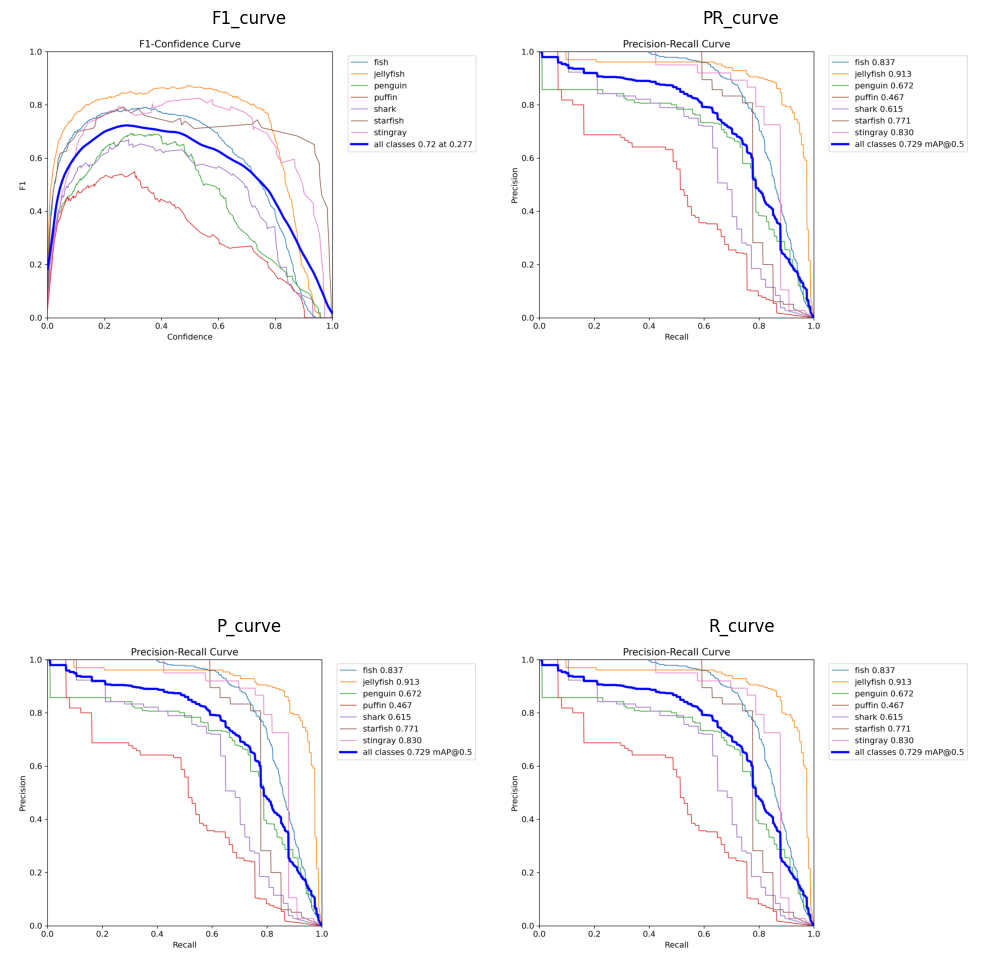

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the images
image_path1 = "/content/runs/detect/val/F1_curve.png"
image_path2 = "/content/runs/detect/val/PR_curve.png"
image_path3 = "/content/runs/detect/val/P_curve.png"
image_path4 = "/content/runs/detect/val/R_curve.png"
# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 15))  # 1 row, 2 columns

# Load and display the first image
img1 = mpimg.imread(image_path1)
axes[0][0].imshow(img1)
axes[0][0].set_title("F1_curve")
axes[0][0].axis('off')  # Turn off axis labels

# Load and display the second image
img2 = mpimg.imread(image_path2)
axes[0][1].imshow(img2)
axes[0][1].set_title("PR_curve")
axes[0][1].axis('off')  # Turn off axis labels

# Load and display the third image
img3 = mpimg.imread(image_path3)
axes[1][0].imshow(img2)
axes[1][0].set_title("P_curve")
axes[1][0].axis('off')  # Turn off axis labels

# Load and display the fourth image
img4 = mpimg.imread(image_path4)
axes[1][1].imshow(img2)
axes[1][1].set_title("R_curve")
axes[1][1].axis('off')  # Turn off axis labels


# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


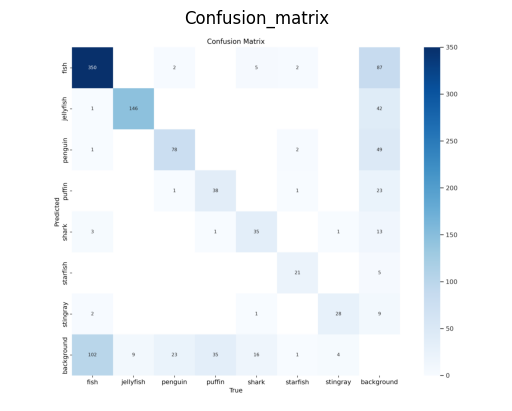

In [11]:
# Path to the image
image_path = "/content/runs/detect/val/confusion_matrix.png"

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.title("Confusion_matrix")  # Set the title to "F1_curve"
plt.axis('off')  # Turn off axis labels
plt.show()


image 1/1 /content/drive/MyDrive/Aquarium Combined/test/images/IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg: 640x480 13 fishs, 2 sharks, 1 stingray, 82.4ms
Speed: 2.8ms preprocess, 82.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/aquarium_model2


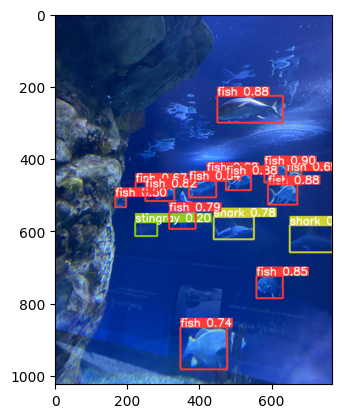

In [12]:
# Predict on a new image
results = model.predict(source='/content/drive/MyDrive/Aquarium Combined/test/images/IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg',  # Change to your test image path
                        save=True, conf=0.2, iou=0.5)

# Display the prediction result
prediction_plot = results[0].plot()
plt.imshow(cv2.cvtColor(prediction_plot, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
plt.show()

# Experiment - 2

In [1]:
!pip install -q transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 9.8 MB/s eta 0:00:00


In [2]:
import requests, zipfile, io

def download_data():
    url = "https://www.dropbox.com/s/l1e45oht447053f/ADE20k_toy_dataset.zip?dl=1"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

download_data()

In [3]:
from datasets import load_dataset

load_entire_dataset = False

if load_entire_dataset:
  dataset = load_dataset("scene_parse_150")

In [4]:
from torch.utils.data import Dataset
import os
from PIL import Image



class SemanticSegmentationDataset(Dataset):
    """Image (semantic) segmentation dataset."""

    def __init__(self, root_dir, image_processor, train=True):
        """
        Args:
            root_dir (string): Root directory of the dataset containing the images + annotations.
            image_processor (SegFormerImageProcessor): image processor to prepare images + segmentation maps.
            train (bool): Whether to load "training" or "validation" images + annotations.
        """
        self.root_dir = root_dir
        self.image_processor = image_processor
        self.train = train

        sub_path = "training" if self.train else "validation"
        self.img_dir = os.path.join(self.root_dir, "images", sub_path)
        self.ann_dir = os.path.join(self.root_dir, "annotations", sub_path)

        # read images
        image_file_names = []
        for root, dirs, files in os.walk(self.img_dir):
          image_file_names.extend(files)
        self.images = sorted(image_file_names)

        # read annotations
        annotation_file_names = []
        for root, dirs, files in os.walk(self.ann_dir):
          annotation_file_names.extend(files)
        self.annotations = sorted(annotation_file_names)

        assert len(self.images) == len(self.annotations), "There must be as many images as there are segmentation maps"

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):

        image = Image.open(os.path.join(self.img_dir, self.images[idx]))
        segmentation_map = Image.open(os.path.join(self.ann_dir, self.annotations[idx]))

        # randomly crop + pad both image and segmentation map to same size
        encoded_inputs = self.image_processor(image, segmentation_map, return_tensors="pt")

        for k,v in encoded_inputs.items():
          encoded_inputs[k].squeeze_() # remove batch dimension

        return encoded_inputs

In [5]:
from transformers import SegformerImageProcessor

root_dir = '/content/ADE20k_toy_dataset'
image_processor = SegformerImageProcessor(reduce_labels=True)

train_dataset = SemanticSegmentationDataset(root_dir=root_dir, image_processor=image_processor)
valid_dataset = SemanticSegmentationDataset(root_dir=root_dir, image_processor=image_processor, train=False)

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [6]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(valid_dataset))

Number of training examples: 10
Number of validation examples: 10


In [7]:
encoded_inputs = train_dataset[0]

In [8]:
encoded_inputs["pixel_values"].shape

torch.Size([3, 512, 512])

In [9]:
encoded_inputs["labels"].shape

torch.Size([512, 512])

In [10]:
encoded_inputs["labels"]

tensor([[255, 255, 255,  ...,   5,   5,   5],
        [255,   5,   5,  ...,   5,   5,   5],
        [255,   5,   5,  ...,   5,   5,   5],
        ...,
        [  3,   3,   3,  ...,   0,   0, 255],
        [  3,   3,   3,  ...,   0,   0, 255],
        [  3,   3,   3,  ...,   0,   0,   0]])

In [11]:
encoded_inputs["labels"].squeeze().unique()

tensor([  0,   3,   4,   5,  12,  17,  31,  32,  42,  43,  87,  96, 104, 125,
        138, 149, 255])

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=2)

In [13]:
batch = next(iter(train_dataloader))

In [14]:
for k,v in batch.items():
  print(k, v.shape)

pixel_values torch.Size([2, 3, 512, 512])
labels torch.Size([2, 512, 512])


In [15]:
batch["labels"].shape

torch.Size([2, 512, 512])

In [16]:
mask = (batch["labels"] != 255)
mask

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[ True,  True,  True,  ...,  True,  True, False],
         [ True,  True,  True,  ...,  True,  True, False],
         [ True,  True,  True,  ...,  True,  True, False],
         ...,
         [ True,  True,  True,  ...,  True,  True, False],
         [ True,  True,  True,  ...,  True,  True, False],
         [False, False, False,  ...,  True,  True, False]]])

In [17]:
batch["labels"][mask]

tensor([12, 12, 12,  ...,  0,  0,  0])

In [18]:
from transformers import SegformerForSemanticSegmentation
import json
from huggingface_hub import hf_hub_download

# load id2label mapping from a JSON on the hub
repo_id = "huggingface/label-files"
filename = "ade20k-id2label.json"
id2label = json.load(open(hf_hub_download(repo_id=repo_id, filename=filename, repo_type="dataset"), "r"))
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}

# define model
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/mit-b0",
                                                         num_labels=150,
                                                         id2label=id2label,
                                                         label2id=label2id,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ade20k-id2label.json:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
import evaluate

metric = evaluate.load("mean_iou")

In [20]:
image_processor.do_reduce_labels

True

In [21]:
import torch
from torch import nn
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

# define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00006)
# move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for epoch in range(200):  # loop over the dataset multiple times
   print("Epoch:", epoch)
   for idx, batch in enumerate(tqdm(train_dataloader)):
        # get the inputs;
        pixel_values = batch["pixel_values"].to(device)
        labels = batch["labels"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(pixel_values=pixel_values, labels=labels)
        loss, logits = outputs.loss, outputs.logits

        loss.backward()
        optimizer.step()

        # evaluate
        with torch.no_grad():
          upsampled_logits = nn.functional.interpolate(logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
          predicted = upsampled_logits.argmax(dim=1)

          # note that the metric expects predictions + labels as numpy arrays
          metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

        # let's print loss and metrics every 100 batches
        if idx % 100 == 0:
          # currently using _compute instead of compute
          # see this issue for more info: https://github.com/huggingface/evaluate/pull/328#issuecomment-1286866576
          metrics = metric._compute(
                  predictions=predicted.cpu(),
                  references=labels.cpu(),
                  num_labels=len(id2label),
                  ignore_index=255,
                  reduce_labels=False, # we've already reduced the labels ourselves
              )

          print("Loss:", loss.item())
          print("Mean_iou:", metrics["mean_iou"])
          print("Mean accuracy:", metrics["mean_accuracy"])

Epoch: 0


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


Loss: 5.009581565856934
Mean_iou: 0.0003485060469319075
Mean accuracy: 0.0036641589113705236
Epoch: 1


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 4.886044979095459
Mean_iou: 0.0013835249404368878
Mean accuracy: 0.022047224078846645
Epoch: 2


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 4.572994232177734
Mean_iou: 0.019971776574098897
Mean accuracy: 0.27081147223065855
Epoch: 3


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 4.585669040679932
Mean_iou: 0.016411988248746092
Mean accuracy: 0.1262539319744482
Epoch: 4


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 4.369863033294678
Mean_iou: 0.029429075836659113
Mean accuracy: 0.17929155381711664
Epoch: 5


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 4.352977752685547
Mean_iou: 0.028415880502328374
Mean accuracy: 0.28686281680865217
Epoch: 6


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.9805328845977783
Mean_iou: 0.11688052091473097
Mean accuracy: 0.5799212661135776
Epoch: 7


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.702376127243042
Mean_iou: 0.13357172879346896
Mean accuracy: 0.40789604083976694
Epoch: 8


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.9781017303466797
Mean_iou: 0.07469605115194757
Mean accuracy: 0.2859581123658823
Epoch: 9


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 4.022666931152344
Mean_iou: 0.07773692801040975
Mean accuracy: 0.5044240087500982
Epoch: 10


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.8478357791900635
Mean_iou: 0.10934908633508716
Mean accuracy: 0.39191167554616807
Epoch: 11


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.601499080657959
Mean_iou: 0.1891290226193575
Mean accuracy: 0.46333912856376236
Epoch: 12


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.382857322692871
Mean_iou: 0.18751513408077575
Mean accuracy: 0.37984286721884064
Epoch: 13


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.034534215927124
Mean_iou: 0.24424557182663859
Mean accuracy: 0.56534071003876
Epoch: 14


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.4032905101776123
Mean_iou: 0.14471095706183484
Mean accuracy: 0.3160698310342326
Epoch: 15


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.322535276412964
Mean_iou: 0.1487851388973504
Mean accuracy: 0.31854763173674516
Epoch: 16


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 3.2542054653167725
Mean_iou: 0.16390699332919306
Mean accuracy: 0.30456123653335726
Epoch: 17


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.9483485221862793
Mean_iou: 0.15841438097217608
Mean accuracy: 0.256634038509845
Epoch: 18


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.8476903438568115
Mean_iou: 0.1428976008454791
Mean accuracy: 0.24557044201184808
Epoch: 19


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.9389917850494385
Mean_iou: 0.19699724857237563
Mean accuracy: 0.3400166592486207
Epoch: 20


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.7742443084716797
Mean_iou: 0.2704682184854085
Mean accuracy: 0.4461029983737247
Epoch: 21


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.7941946983337402
Mean_iou: 0.2629366546259658
Mean accuracy: 0.4873062701828347
Epoch: 22


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.6410443782806396
Mean_iou: 0.20280500278292904
Mean accuracy: 0.49790889520719606
Epoch: 23


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.4071478843688965
Mean_iou: 0.17881118730142673
Mean accuracy: 0.27920538377530224
Epoch: 24


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.9113070964813232
Mean_iou: 0.6346453462898257
Mean accuracy: 0.7845333732295249
Epoch: 25


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.4332690238952637
Mean_iou: 0.18332801398419352
Mean accuracy: 0.29705969495916523
Epoch: 26


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.7029043436050415
Mean_iou: 0.39288235496420565
Mean accuracy: 0.674801348726163
Epoch: 27


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.4675167798995972
Mean_iou: 0.6998936218947455
Mean accuracy: 0.8338668309971798
Epoch: 28


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.1182541847229004
Mean_iou: 0.3205637403209031
Mean accuracy: 0.4533511859792129
Epoch: 29


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.1283857822418213
Mean_iou: 0.19690968712896617
Mean accuracy: 0.31389967096295474
Epoch: 30


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.9466387033462524
Mean_iou: 0.2063555769393481
Mean accuracy: 0.332779457609696
Epoch: 31


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.7235482931137085
Mean_iou: 0.3521054636445833
Mean accuracy: 0.44228519155220725
Epoch: 32


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.392377257347107
Mean_iou: 0.40168829430421743
Mean accuracy: 0.643569282831628
Epoch: 33


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.2556513547897339
Mean_iou: 0.4492804024274268
Mean accuracy: 0.7086936497660675
Epoch: 34


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.105469226837158
Mean_iou: 0.18053182791943895
Mean accuracy: 0.26727897247052695
Epoch: 35


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.2413196563720703
Mean_iou: 0.4263726020299024
Mean accuracy: 0.5089137373822389
Epoch: 36


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.024689197540283
Mean_iou: 0.20110102107860117
Mean accuracy: 0.2871679174800716
Epoch: 37


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.3952008485794067
Mean_iou: 0.21154425440401214
Mean accuracy: 0.27554787785654977
Epoch: 38


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 2.0213794708251953
Mean_iou: 0.22021234643551307
Mean accuracy: 0.34609048357061667
Epoch: 39


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.7922801971435547
Mean_iou: 0.3514867982021194
Mean accuracy: 0.6008328918335527
Epoch: 40


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6640368700027466
Mean_iou: 0.4328415554985701
Mean accuracy: 0.6155731114080525
Epoch: 41


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.7547500133514404
Mean_iou: 0.3892522822350811
Mean accuracy: 0.5091071974803644
Epoch: 42


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.320826530456543
Mean_iou: 0.3249661213579441
Mean accuracy: 0.5433305712418064
Epoch: 43


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.7409332990646362
Mean_iou: 0.4075960492668192
Mean accuracy: 0.5092388780651954
Epoch: 44


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.571056842803955
Mean_iou: 0.47441242995272637
Mean accuracy: 0.7309433606749083
Epoch: 45


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.4560644626617432
Mean_iou: 0.08937958911677753
Mean accuracy: 0.16367032596858277
Epoch: 46


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7955902218818665
Mean_iou: 0.501143947351591
Mean accuracy: 0.727735892951496
Epoch: 47


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.4658633470535278
Mean_iou: 0.16523790913284553
Mean accuracy: 0.3009700576913646
Epoch: 48


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.287469744682312
Mean_iou: 0.32354403237219553
Mean accuracy: 0.5471939458984908
Epoch: 49


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.2907780408859253
Mean_iou: 0.2638106988690926
Mean accuracy: 0.3752096354411158
Epoch: 50


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.6082075834274292
Mean_iou: 0.18338037210426258
Mean accuracy: 0.2382380220552399
Epoch: 51


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.4233744144439697
Mean_iou: 0.2800253759066239
Mean accuracy: 0.40394346951841037
Epoch: 52


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.158277153968811
Mean_iou: 0.2601343354096438
Mean accuracy: 0.3586363732418939
Epoch: 53


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.3718857765197754
Mean_iou: 0.17186829271697096
Mean accuracy: 0.3090467675484678
Epoch: 54


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.6364473104476929
Mean_iou: 0.2855101938300408
Mean accuracy: 0.449392151778176
Epoch: 55


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6341296434402466
Mean_iou: 0.5234096042243924
Mean accuracy: 0.7517730814336068
Epoch: 56


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.4656343460083008
Mean_iou: 0.18867182829589016
Mean accuracy: 0.3099088833705318
Epoch: 57


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.524188756942749
Mean_iou: 0.35651696305827524
Mean accuracy: 0.4392938776416305
Epoch: 58


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.42966264486312866
Mean_iou: 0.43024693325550717
Mean accuracy: 0.6123037794868059
Epoch: 59


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.3359214067459106
Mean_iou: 0.3367085455998365
Mean accuracy: 0.4746754485686346
Epoch: 60


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.1577768325805664
Mean_iou: 0.09703334480472389
Mean accuracy: 0.1634238140892709
Epoch: 61


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.9304603338241577
Mean_iou: 0.34860828104036123
Mean accuracy: 0.5799450616082993
Epoch: 62


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.3736598491668701
Mean_iou: 0.12589555684727882
Mean accuracy: 0.2032005933085476
Epoch: 63


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.219467043876648
Mean_iou: 0.3530410001962583
Mean accuracy: 0.4826809755995657
Epoch: 64


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.1697548627853394
Mean_iou: 0.49043297339247327
Mean accuracy: 0.655905724654083
Epoch: 65


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.2343864440917969
Mean_iou: 0.11890937379721914
Mean accuracy: 0.2064273146973522
Epoch: 66


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.116197943687439
Mean_iou: 0.19976906604750885
Mean accuracy: 0.3289305555746851
Epoch: 67


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.4620330333709717
Mean_iou: 0.3521805606821482
Mean accuracy: 0.4761389507915953
Epoch: 68


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.1370495557785034
Mean_iou: 0.4343527998197867
Mean accuracy: 0.5582067127038134
Epoch: 69


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.2175443172454834
Mean_iou: 0.19086589633066559
Mean accuracy: 0.25462538177162775
Epoch: 70


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.1403770446777344
Mean_iou: 0.5107328926434985
Mean accuracy: 0.6178444570380196
Epoch: 71


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.900550365447998
Mean_iou: 0.2455473670132572
Mean accuracy: 0.37747227176907694
Epoch: 72


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8117279410362244
Mean_iou: 0.5553942267062368
Mean accuracy: 0.7235927139271221
Epoch: 73


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.0955865383148193
Mean_iou: 0.3714444634199521
Mean accuracy: 0.4699069227730994
Epoch: 74


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.703056275844574
Mean_iou: 0.3988090565135962
Mean accuracy: 0.6159060552971208
Epoch: 75


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.9599214792251587
Mean_iou: 0.43461602172696984
Mean accuracy: 0.5119114962775294
Epoch: 76


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7592942118644714
Mean_iou: 0.35816764286417285
Mean accuracy: 0.5784766029496663
Epoch: 77


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8576714396476746
Mean_iou: 0.5951082389472706
Mean accuracy: 0.7675625325252006
Epoch: 78


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.0626791715621948
Mean_iou: 0.5744707993522452
Mean accuracy: 0.668315656094173
Epoch: 79


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.9680201411247253
Mean_iou: 0.5440090697318617
Mean accuracy: 0.6563703583201224
Epoch: 80


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.9000689387321472
Mean_iou: 0.22516397192049775
Mean accuracy: 0.3582597751332193
Epoch: 81


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.079878568649292
Mean_iou: 0.2045712343285826
Mean accuracy: 0.2779053694126662
Epoch: 82


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7855021953582764
Mean_iou: 0.21656767355534892
Mean accuracy: 0.38628692597648845
Epoch: 83


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.2302767038345337
Mean_iou: 0.17322866280952393
Mean accuracy: 0.2615989637374406
Epoch: 84


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.592869222164154
Mean_iou: 0.48579350774709057
Mean accuracy: 0.5604285513919619
Epoch: 85


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7619848251342773
Mean_iou: 0.6804042295343776
Mean accuracy: 0.8060528773796897
Epoch: 86


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8814420700073242
Mean_iou: 0.5346731606533095
Mean accuracy: 0.6433069703558812
Epoch: 87


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.9055289626121521
Mean_iou: 0.487325714377371
Mean accuracy: 0.5715386255719087
Epoch: 88


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.752620279788971
Mean_iou: 0.340026482797856
Mean accuracy: 0.43052859415086653
Epoch: 89


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.9057663083076477
Mean_iou: 0.3313233863980921
Mean accuracy: 0.45834894808263643
Epoch: 90


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.270746648311615
Mean_iou: 0.36977590249033915
Mean accuracy: 0.6187728877963322
Epoch: 91


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.0281720161437988
Mean_iou: 0.3719655975983008
Mean accuracy: 0.44712858807024014
Epoch: 92


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.45548322796821594
Mean_iou: 0.42562929383204384
Mean accuracy: 0.5211094019390073
Epoch: 93


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7851144671440125
Mean_iou: 0.7682898756137975
Mean accuracy: 0.8408302253697384
Epoch: 94


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.990668773651123
Mean_iou: 0.2575459392715771
Mean accuracy: 0.3027245489173827
Epoch: 95


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.1877315044403076
Mean_iou: 0.285114056935528
Mean accuracy: 0.4144392571309018
Epoch: 96


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.0152623653411865
Mean_iou: 0.44528291364176986
Mean accuracy: 0.5231021160594438
Epoch: 97


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6347696781158447
Mean_iou: 0.7431670814210194
Mean accuracy: 0.8023496909729992
Epoch: 98


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6344006657600403
Mean_iou: 0.2994713241507919
Mean accuracy: 0.46683395830607877
Epoch: 99


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5356332063674927
Mean_iou: 0.3466546613133994
Mean accuracy: 0.6245598044992245
Epoch: 100


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7237820625305176
Mean_iou: 0.14715786321362614
Mean accuracy: 0.23025009768277016
Epoch: 101


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7668344974517822
Mean_iou: 0.5699818736838124
Mean accuracy: 0.6473093878614917
Epoch: 102


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 1.0093580484390259
Mean_iou: 0.2513570580049557
Mean accuracy: 0.31013846443008
Epoch: 103


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8648821711540222
Mean_iou: 0.40814096298905533
Mean accuracy: 0.4618848970929105
Epoch: 104


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6892455816268921
Mean_iou: 0.245672740400349
Mean accuracy: 0.31260216028332577
Epoch: 105


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2567460238933563
Mean_iou: 0.4354691568804952
Mean accuracy: 0.618284199127938
Epoch: 106


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.774983286857605
Mean_iou: 0.5037409734174003
Mean accuracy: 0.5402055586120711
Epoch: 107


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6869522333145142
Mean_iou: 0.2712653222444804
Mean accuracy: 0.37181687891206433
Epoch: 108


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.677395224571228
Mean_iou: 0.6104013381852292
Mean accuracy: 0.6451837619419819
Epoch: 109


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8483082056045532
Mean_iou: 0.3876028441495763
Mean accuracy: 0.4339462465598644
Epoch: 110


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.40297043323516846
Mean_iou: 0.41325725658395324
Mean accuracy: 0.6191961329985844
Epoch: 111


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6329410672187805
Mean_iou: 0.2884446780492663
Mean accuracy: 0.3801635597247558
Epoch: 112


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6223018765449524
Mean_iou: 0.5490355443323091
Mean accuracy: 0.6115828820478778
Epoch: 113


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7331503033638
Mean_iou: 0.4477668907065984
Mean accuracy: 0.5802714300405963
Epoch: 114


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8325647711753845
Mean_iou: 0.36350194970207855
Mean accuracy: 0.4536453732177654
Epoch: 115


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5752032995223999
Mean_iou: 0.8087377215167422
Mean accuracy: 0.8614920253107992
Epoch: 116


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.8341009020805359
Mean_iou: 0.28186594625423583
Mean accuracy: 0.3366974946266443
Epoch: 117


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5185735821723938
Mean_iou: 0.3739594972458891
Mean accuracy: 0.47648966028561923
Epoch: 118


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5850550532341003
Mean_iou: 0.5053018801496335
Mean accuracy: 0.6497099942065409
Epoch: 119


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6340240836143494
Mean_iou: 0.49160931688982956
Mean accuracy: 0.5632553134723469
Epoch: 120


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7223532795906067
Mean_iou: 0.4469689488093842
Mean accuracy: 0.4887491793749196
Epoch: 121


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6513106822967529
Mean_iou: 0.31851379156575893
Mean accuracy: 0.4422101625516014
Epoch: 122


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5266261100769043
Mean_iou: 0.7783699778576213
Mean accuracy: 0.8991210508884853
Epoch: 123


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5503360033035278
Mean_iou: 0.34044991572657235
Mean accuracy: 0.5087273431806667
Epoch: 124


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.60682213306427
Mean_iou: 0.589514325714237
Mean accuracy: 0.6736860580583086
Epoch: 125


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7736290693283081
Mean_iou: 0.44765394756676335
Mean accuracy: 0.4925870152570791
Epoch: 126


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6362544298171997
Mean_iou: 0.4189376141405729
Mean accuracy: 0.4856894272339508
Epoch: 127


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5436415672302246
Mean_iou: 0.551551777369324
Mean accuracy: 0.6098209722365533
Epoch: 128


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5321292877197266
Mean_iou: 0.662525076782803
Mean accuracy: 0.7448254908547395
Epoch: 129


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.546983540058136
Mean_iou: 0.281604209709493
Mean accuracy: 0.3595997100765187
Epoch: 130


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5135152339935303
Mean_iou: 0.722042496849665
Mean accuracy: 0.7499488185809415
Epoch: 131


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5400875210762024
Mean_iou: 0.2572201887964774
Mean accuracy: 0.3611457905323681
Epoch: 132


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5170735120773315
Mean_iou: 0.39784636469436385
Mean accuracy: 0.49457338210655655
Epoch: 133


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.47681406140327454
Mean_iou: 0.6501156066251129
Mean accuracy: 0.6829356931364137
Epoch: 134


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.4692615568637848
Mean_iou: 0.8293325530000611
Mean accuracy: 0.8765291035610498
Epoch: 135


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.38257983326911926
Mean_iou: 0.4154298528495413
Mean accuracy: 0.721314546326657
Epoch: 136


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.12628868222236633
Mean_iou: 0.44022420549614044
Mean accuracy: 0.6735487105459496
Epoch: 137


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.14603544771671295
Mean_iou: 0.8382221936979851
Mean accuracy: 0.8571242707275772
Epoch: 138


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.11562132090330124
Mean_iou: 0.3721941605727693
Mean accuracy: 0.7084901610683376
Epoch: 139


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.49323946237564087
Mean_iou: 0.17948892351858786
Mean accuracy: 0.29452814890261864
Epoch: 140


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5989139080047607
Mean_iou: 0.5390200008570384
Mean accuracy: 0.6256702618387718
Epoch: 141


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5862590074539185
Mean_iou: 0.4857185133700428
Mean accuracy: 0.5284747863848585
Epoch: 142


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5129075646400452
Mean_iou: 0.47412519342882736
Mean accuracy: 0.5490259638961091
Epoch: 143


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.40218448638916016
Mean_iou: 0.7905577014292849
Mean accuracy: 0.8316403024922235
Epoch: 144


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7055748105049133
Mean_iou: 0.48468798350914294
Mean accuracy: 0.5768401817899231
Epoch: 145


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5700196027755737
Mean_iou: 0.4461627962209396
Mean accuracy: 0.5089030667965736
Epoch: 146


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.35863858461380005
Mean_iou: 0.3421011365024241
Mean accuracy: 0.5579910329445839
Epoch: 147


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.1585000455379486
Mean_iou: 0.7454029192936873
Mean accuracy: 0.8549763903460861
Epoch: 148


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5831583142280579
Mean_iou: 0.47079297830976746
Mean accuracy: 0.5479392901848525
Epoch: 149


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.43082648515701294
Mean_iou: 0.6557994319539219
Mean accuracy: 0.6961249997937552
Epoch: 150


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3843534290790558
Mean_iou: 0.5297125780438219
Mean accuracy: 0.5672944201128577
Epoch: 151


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6905010938644409
Mean_iou: 0.3079127608962409
Mean accuracy: 0.36953080278604117
Epoch: 152


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5050960183143616
Mean_iou: 0.49345016746125087
Mean accuracy: 0.5723679859130644
Epoch: 153


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5359771251678467
Mean_iou: 0.5118467146097421
Mean accuracy: 0.5547542412632086
Epoch: 154


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.6845667958259583
Mean_iou: 0.24492429300910554
Mean accuracy: 0.3425508590417149
Epoch: 155


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.23406869173049927
Mean_iou: 0.5779715565754455
Mean accuracy: 0.6399883327125734
Epoch: 156


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5560147762298584
Mean_iou: 0.2716166304019235
Mean accuracy: 0.3225327660778539
Epoch: 157


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.14284011721611023
Mean_iou: 0.9172642181062177
Mean accuracy: 0.9357312995212403
Epoch: 158


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5104949474334717
Mean_iou: 0.5913050721228315
Mean accuracy: 0.6225244016519026
Epoch: 159


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.4916432797908783
Mean_iou: 0.5702474277195458
Mean accuracy: 0.6540494489638526
Epoch: 160


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.48750367760658264
Mean_iou: 0.6125119981672515
Mean accuracy: 0.6435569788294083
Epoch: 161


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.527996838092804
Mean_iou: 0.3661156008591115
Mean accuracy: 0.4310671479918672
Epoch: 162


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.4507888853549957
Mean_iou: 0.6200388143132818
Mean accuracy: 0.6901606707763827
Epoch: 163


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3776025176048279
Mean_iou: 0.5984482619282735
Mean accuracy: 0.7718030866557577
Epoch: 164


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3910713195800781
Mean_iou: 0.664632474113804
Mean accuracy: 0.7084197584304944
Epoch: 165


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.42657944560050964
Mean_iou: 0.30695860539605807
Mean accuracy: 0.41021891827212137
Epoch: 166


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.4364108145236969
Mean_iou: 0.3129515083707723
Mean accuracy: 0.3950920407829715
Epoch: 167


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.43991392850875854
Mean_iou: 0.631710106780899
Mean accuracy: 0.6608255738229564
Epoch: 168


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.16285954415798187
Mean_iou: 0.8490177544183961
Mean accuracy: 0.8656385050889523
Epoch: 169


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.10055021941661835
Mean_iou: 0.8487186756680201
Mean accuracy: 0.8634862011313318
Epoch: 170


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5115482211112976
Mean_iou: 0.2625712773101424
Mean accuracy: 0.351758351049926
Epoch: 171


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.34753474593162537
Mean_iou: 0.6365407098542706
Mean accuracy: 0.7114088665736965
Epoch: 172


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2656491696834564
Mean_iou: 0.9276792796312713
Mean accuracy: 0.9542564636639403
Epoch: 173


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.28547945618629456
Mean_iou: 0.3235405649939953
Mean accuracy: 0.5449207680129411
Epoch: 174


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.11574866622686386
Mean_iou: 0.9442883996915534
Mean accuracy: 0.9652153100941118
Epoch: 175


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.4391551911830902
Mean_iou: 0.5113248271920415
Mean accuracy: 0.5888596205740333
Epoch: 176


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.42982158064842224
Mean_iou: 0.5857612718301498
Mean accuracy: 0.6581561843717123
Epoch: 177


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.27169910073280334
Mean_iou: 0.6642840138143645
Mean accuracy: 0.695139293172508
Epoch: 178


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3821532130241394
Mean_iou: 0.6206772163285972
Mean accuracy: 0.6913628639417381
Epoch: 179


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.41075825691223145
Mean_iou: 0.618253104023491
Mean accuracy: 0.686723367901055
Epoch: 180


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.481395959854126
Mean_iou: 0.5384273873242729
Mean accuracy: 0.581718834995383
Epoch: 181


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3617647588253021
Mean_iou: 0.6856161457162039
Mean accuracy: 0.7592968862525218
Epoch: 182


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.43324998021125793
Mean_iou: 0.5419263249704774
Mean accuracy: 0.5785110844401504
Epoch: 183


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.405475378036499
Mean_iou: 0.39203818670970203
Mean accuracy: 0.44180982440221417
Epoch: 184


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2990632653236389
Mean_iou: 0.7657193839340213
Mean accuracy: 0.787854241831189
Epoch: 185


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.08464497327804565
Mean_iou: 0.3758222335147554
Mean accuracy: 0.7143638885253261
Epoch: 186


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.45308980345726013
Mean_iou: 0.5032807088072127
Mean accuracy: 0.5799165336554362
Epoch: 187


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.4589065611362457
Mean_iou: 0.2691759853563065
Mean accuracy: 0.36306469732636293
Epoch: 188


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.5993418097496033
Mean_iou: 0.5024657968972747
Mean accuracy: 0.645866613007185
Epoch: 189


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.18748532235622406
Mean_iou: 0.49427872512878307
Mean accuracy: 0.65062407350952
Epoch: 190


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3138694763183594
Mean_iou: 0.43969212095644006
Mean accuracy: 0.5839113347188746
Epoch: 191


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.7042020559310913
Mean_iou: 0.2749624461021992
Mean accuracy: 0.409720363756633
Epoch: 192


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3250785768032074
Mean_iou: 0.8109676892046829
Mean accuracy: 0.8354981588748753
Epoch: 193


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2815837562084198
Mean_iou: 0.6718706364990207
Mean accuracy: 0.7411542968764576
Epoch: 194


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3718237578868866
Mean_iou: 0.3535802485210519
Mean accuracy: 0.46201042179715607
Epoch: 195


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2682132124900818
Mean_iou: 0.7574353141905407
Mean accuracy: 0.778313862203675
Epoch: 196


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.25707900524139404
Mean_iou: 0.39223281238431557
Mean accuracy: 0.5653049006197093
Epoch: 197


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.22005131840705872
Mean_iou: 0.9321314447340465
Mean accuracy: 0.94798373464008
Epoch: 198


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.20806315541267395
Mean_iou: 0.5965249420401709
Mean accuracy: 0.7102096090448382
Epoch: 199


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2451949566602707
Mean_iou: 0.8080420379866085
Mean accuracy: 0.8313271539335783


In [22]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

In [23]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(pixel_values=pixel_values)

In [24]:
import os

# Get lists of image filenames and map filenames
image_directory = '/content/ADE20k_toy_dataset/images/training/'
map_directory = '/content/ADE20k_toy_dataset/annotations/training/'

image_files = os.listdir(image_directory)  # All image files in the directory
map_files = os.listdir(map_directory)      # All map files in the directory

# Extract base filenames (without extensions) for images and maps
image_basenames = {os.path.splitext(f)[0] for f in image_files if f.endswith('.jpg')}
map_basenames = {os.path.splitext(f)[0] for f in map_files if f.endswith('.png')}

# Find common base filenames (those that have both an image and a map)
common_basenames = image_basenames.intersection(map_basenames)

In [25]:
import random

# Randomly select from the common base filenames
random_basenames = random.sample(common_basenames, 3)
random_basenames

<ipython-input-25-ff482945aae3>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_basenames = random.sample(common_basenames, 3)


['ADE_train_00000001', 'ADE_train_00000006', 'ADE_train_00000008']

torch.Size([1, 3, 512, 512])
torch.Size([1, 150, 128, 128])
[[0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 ...
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]]


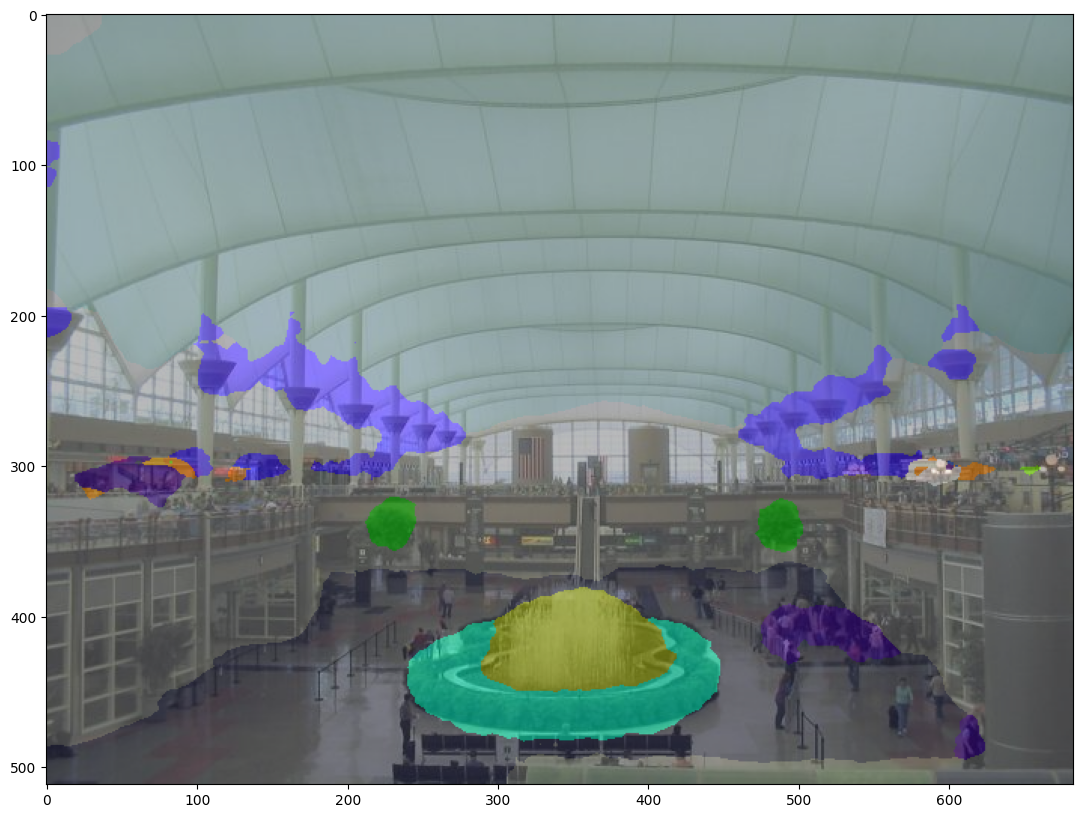

Classes in this image: ['wall', 'floor', 'tree', 'ceiling', 'person', 'plant', 'seat', 'fence', 'column', 'signboard', 'streetlight', 'escalator', 'fountain', 'pot', 'ashcan', 'flag', None]


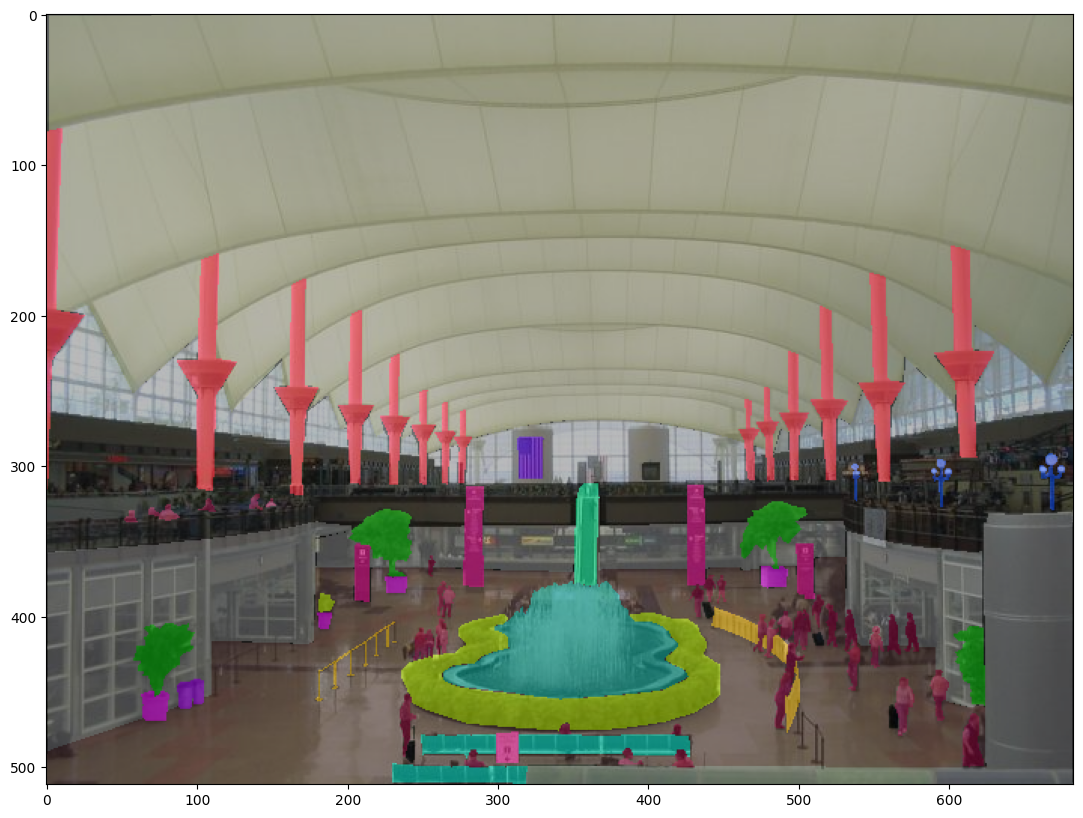

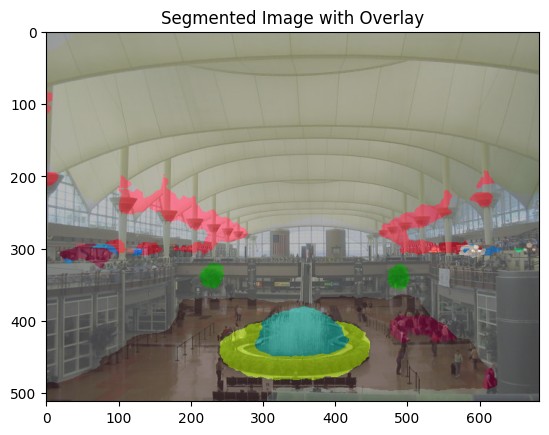

torch.Size([1, 3, 512, 512])
torch.Size([1, 150, 128, 128])
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [18 18 18 ...  3  3  3]
 [18 18 18 ...  3  3  3]
 [18 18 18 ...  3  3  3]]


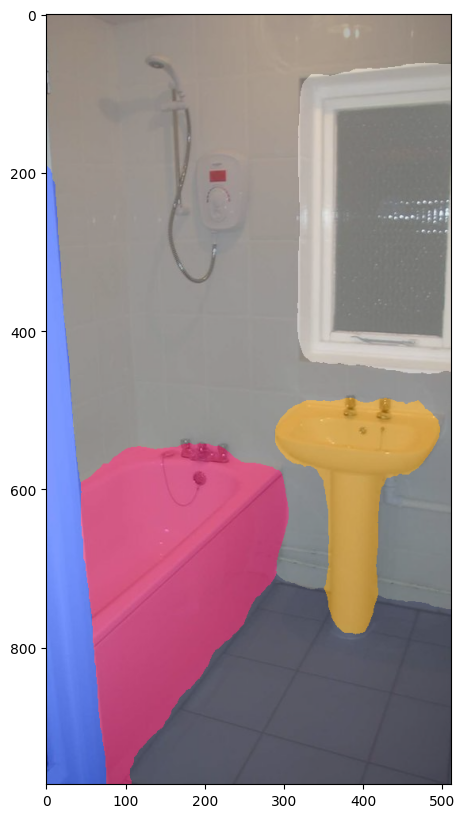

Classes in this image: ['wall', 'floor', 'ceiling', 'windowpane', 'curtain', 'bathtub', 'sink', None]


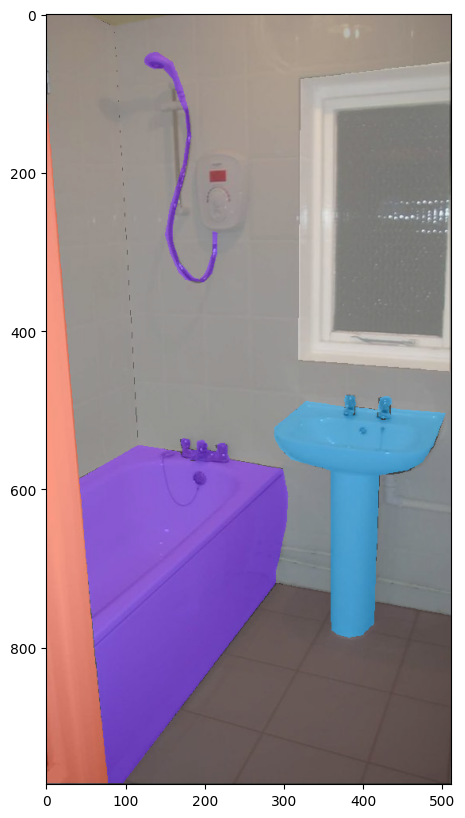

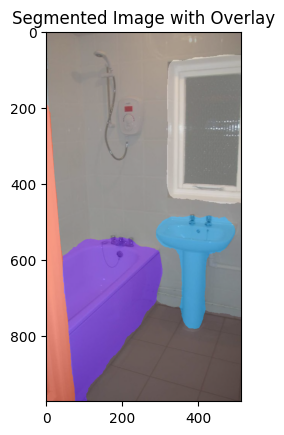

torch.Size([1, 3, 512, 512])
torch.Size([1, 150, 128, 128])
[[0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


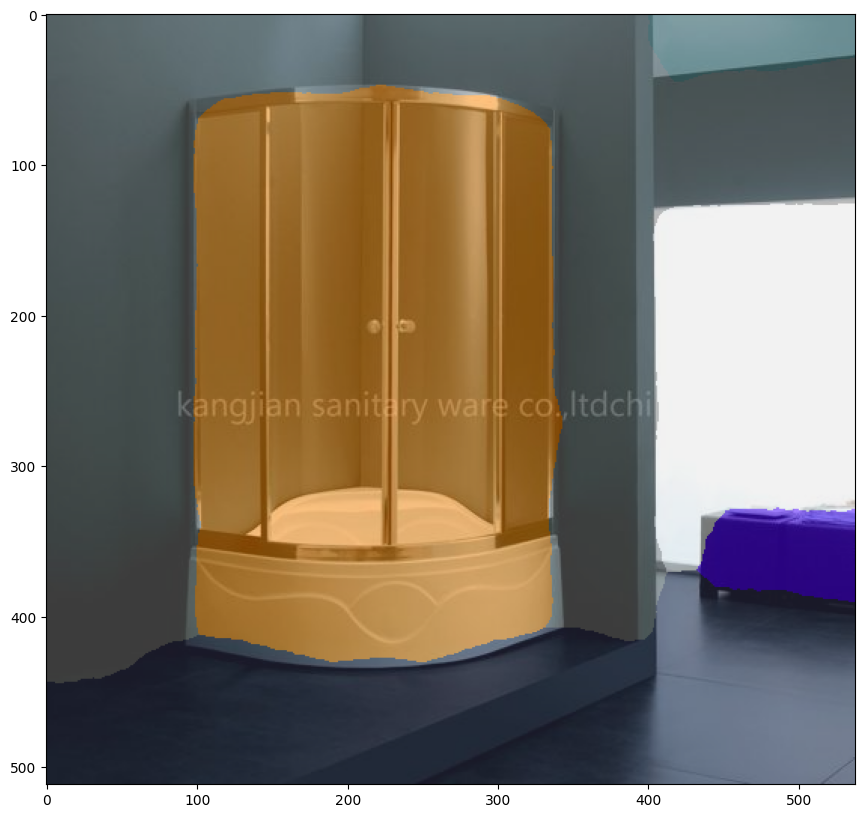

Classes in this image: ['wall', 'floor', 'ceiling', 'windowpane', 'table', 'shower', None]


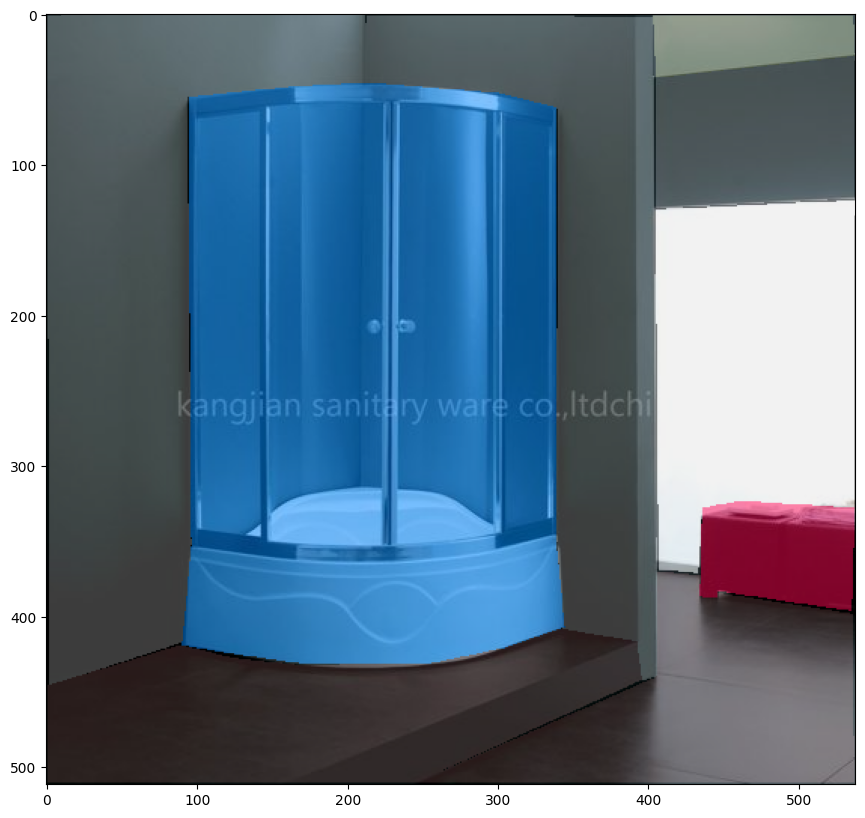

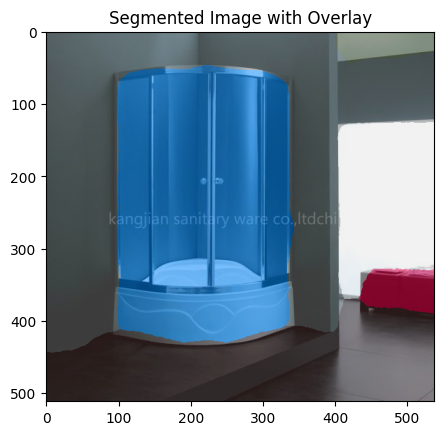

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

results = []

# Loop through the randomly selected images and display them
for basename in random_basenames:
    # Load the image and map
    image_path = os.path.join(image_directory, basename + '.jpg')  # Image path with JPEG extension
    map_path = os.path.join(map_directory, basename + '.png')      # Map path with PNG extension

    image = Image.open(image_path)

    pixel_values = image_processor(image, return_tensors="pt").pixel_values.to(device)
    print(pixel_values.shape)

    # forward pass
    with torch.no_grad():
      outputs = model(pixel_values=pixel_values)

    # logits are of shape (batch_size, num_labels, height/4, width/4)
    logits = outputs.logits.cpu()
    print(logits.shape)
    predicted_segmentation_map = image_processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
    predicted_segmentation_map = predicted_segmentation_map.cpu().numpy()
    print(predicted_segmentation_map)

    color_seg = np.zeros((predicted_segmentation_map.shape[0],
                      predicted_segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3

    palette = np.array(ade_palette())

    for label, color in enumerate(palette):
        color_seg[predicted_segmentation_map == label, :] = color
    # Convert to BGR
    color_seg = color_seg[..., ::-1]

    # Show image + mask
    img = np.array(image) * 0.5 + color_seg * 0.5
    img = img.astype(np.uint8)

    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.show()

    map = Image.open(map_path)

    map

    # convert map to NumPy array
    map = np.array(map)
    map[map == 0] = 255 # background class is replaced by ignore_index
    map = map - 1 # other classes are reduced by one
    map[map == 254] = 255

    classes_map = np.unique(map).tolist()
    unique_classes = [model.config.id2label[idx] if idx!=255 else None for idx in classes_map]
    print("Classes in this image:", unique_classes)

    # create coloured map
    color_seg = np.zeros((map.shape[0], map.shape[1], 3), dtype=np.uint8) # height, width, 3
    palette = np.array(ade_palette())
    for label, color in enumerate(palette):
        color_seg[map == label, :] = color
    # Convert to BGR
    color_seg = cv2.resize(color_seg, (img.shape[1], img.shape[0]))

    # Show image + mask
    img = np.array(image) * 0.5 + color_seg * 0.5
    img = img.astype(np.uint8)

    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.show()


    # metric expects a list of numpy arrays for both predictions and references
    metrics = metric._compute(
                      predictions=[predicted_segmentation_map],
                      references=[map],
                      num_labels=len(id2label),
                      ignore_index=255,
                      reduce_labels=False, # we've already reduced the labels ourselves
                  )

    # Save metric results for reporting
    result = {
        "image": basename,
        "IoU": metrics["mean_iou"],
        "accuracy": metrics["mean_accuracy"]
    }
    results.append(result)

    # Visualization
    color_seg = np.zeros((predicted_segmentation_map.shape[0], predicted_segmentation_map.shape[1], 3), dtype=np.uint8)

    # Create a palette and apply it to color_seg based on predicted_segmentation_map
    palette = np.array(ade_palette())
    for label, color in enumerate(palette):
        color_seg[predicted_segmentation_map == label, :] = color

    img_with_mask = np.array(image) * 0.5 + color_seg * 0.5
    img_with_mask = img_with_mask.astype(np.uint8)

    # Save the generated image
    output_image_path = os.path.join("/content/", basename + '_segmented.jpg')
    Image.fromarray(img_with_mask).save(output_image_path)

    # Show the generated image
    plt.imshow(img_with_mask)
    plt.title("Segmented Image with Overlay")
    plt.show()




In [27]:
import pandas as pd

# print overall metrics
for key in list(metrics.keys())[:3]:
  print(key, metrics[key])

# pretty-print per category metrics as Pandas DataFrame
metric_table = dict()
for id, label in id2label.items():
    metric_table[label] = [
                           metrics["per_category_iou"][id],
                           metrics["per_category_accuracy"][id]
    ]

print("---------------------")
print("per-category metrics:")
pd.DataFrame.from_dict(metric_table, orient="index", columns=["IoU", "accuracy"])

mean_iou 0.9256791635729966
mean_accuracy 0.9546825638119946
overall_accuracy 0.9727041304315838
---------------------
per-category metrics:


IoU  accuracy
wall      0.947620  0.990052
building       NaN       NaN
sky            NaN       NaN
floor     0.950606  0.994297
tree           NaN       NaN
...            ...       ...
shower    0.946979  0.947834
radiator       NaN       NaN
glass          NaN       NaN
clock          NaN       NaN
flag           NaN       NaN

[150 rows x 2 columns]

In [28]:
metric_table

{'wall': [0.9476195458825991, 0.9900518180029297],
 'building': [nan, nan],
 'sky': [nan, nan],
 'floor': [0.9506064200175995, 0.994297376793325],
 'tree': [nan, nan],
 'ceiling': [0.9185261003070624, 0.9833442910365987],
 'road': [nan, nan],
 'bed ': [nan, nan],
 'windowpane': [0.9714622052580887, 0.9934337722978149],
 'grass': [nan, nan],
 'cabinet': [nan, nan],
 'sidewalk': [nan, nan],
 'person': [nan, nan],
 'earth': [nan, nan],
 'door': [nan, nan],
 'table': [0.8188818727860773, 0.8191341857957172],
 'mountain': [nan, nan],
 'plant': [nan, nan],
 'curtain': [nan, nan],
 'chair': [nan, nan],
 'car': [nan, nan],
 'water': [nan, nan],
 'painting': [nan, nan],
 'sofa': [nan, nan],
 'shelf': [nan, nan],
 'house': [nan, nan],
 'sea': [nan, nan],
 'mirror': [nan, nan],
 'rug': [nan, nan],
 'field': [nan, nan],
 'armchair': [nan, nan],
 'seat': [nan, nan],
 'fence': [nan, nan],
 'desk': [nan, nan],
 'rock': [nan, nan],
 'wardrobe': [nan, nan],
 'lamp': [nan, nan],
 'bathtub': [nan, nan],


In [29]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("/content/metrics.csv", index=False)

# Experiemnt - 3

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.applications import vgg19

base_image_path = "/content/images (1).jpeg"
style_reference_image_path = "/content/Large_bonfire.jpg"

result_prefix = "shiva_generated"

# Weights of the different loss components
total_variation_weight = 1e-6
style_weight = 1e-6
content_weight = 2.5e-8

# Dimensions of the generated picture.
width, height = keras.utils.load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

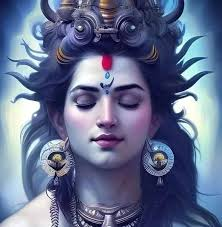

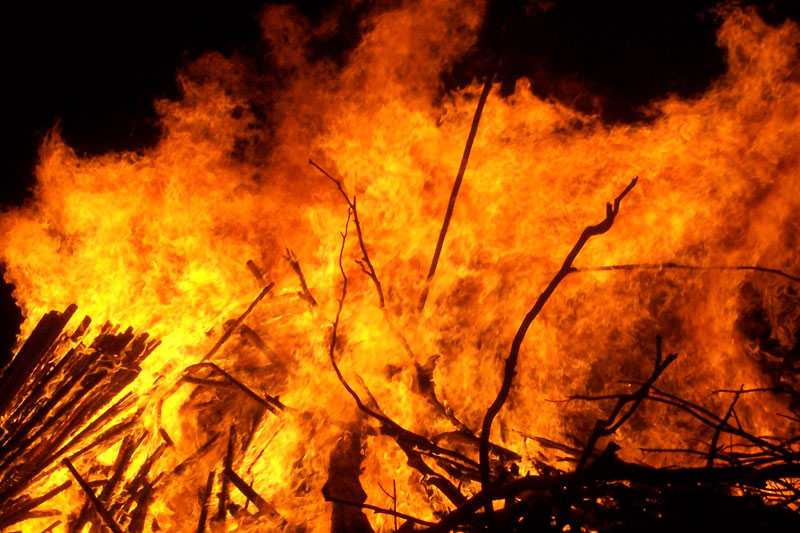

In [ ]:
from IPython.display import Image, display

display(Image(base_image_path))
display(Image(style_reference_image_path))

In [ ]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures into appropriate tensors
    img = keras.utils.load_img(image_path, target_size=(img_nrows, img_ncols))
    img = keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return tf.convert_to_tensor(img)


def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [ ]:
# The gram matrix of an image tensor (feature-wise outer product)


def gram_matrix(x):
    x = tf.transpose(x, (2, 0, 1))
    features = tf.reshape(x, (tf.shape(x)[0], -1))
    gram = tf.matmul(features, tf.transpose(features))
    return gram


# The "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels**2) * (size**2))


# An auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))


# The 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))

In [ ]:
# Build a VGG19 model loaded with pre-trained ImageNet weights
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# List of layers to use for the style loss.
style_layer_names = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
# The layer to use for the content loss.
content_layer_name = "block5_conv2"


def compute_loss(combination_image, base_image, style_reference_image):
    input_tensor = tf.concat(
        [base_image, style_reference_image, combination_image], axis=0
    )
    features = feature_extractor(input_tensor)

    # Initialize the loss
    loss = tf.zeros(shape=())

    # Add content loss
    layer_features = features[content_layer_name]
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    loss = loss + content_weight * content_loss(
        base_image_features, combination_features
    )
    # Add style loss
    for layer_name in style_layer_names:
        layer_features = features[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        sl = style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(style_layer_names)) * sl

    # Add total variation loss
    loss += total_variation_weight * total_variation_loss(combination_image)
    return loss

In [ ]:
@tf.function
def compute_loss_and_grads(combination_image, base_image, style_reference_image):
    with tf.GradientTape() as tape:
        loss = compute_loss(combination_image, base_image, style_reference_image)
    grads = tape.gradient(loss, combination_image)
    return loss, grads

In [ ]:
optimizer = keras.optimizers.SGD(
    keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=100.0, decay_steps=100, decay_rate=0.96
    )
)

base_image = preprocess_image(base_image_path)
style_reference_image = preprocess_image(style_reference_image_path)
combination_image = tf.Variable(preprocess_image(base_image_path))

iterations = 4000
for i in range(1, iterations + 1):
    loss, grads = compute_loss_and_grads(
        combination_image, base_image, style_reference_image
    )
    optimizer.apply_gradients([(grads, combination_image)])
    if i % 100 == 0:
        print("Iteration %d: loss=%.2f" % (i, loss))
        img = deprocess_image(combination_image.numpy())
        fname = result_prefix + "_at_iteration_%d.png" % i
        keras.utils.save_img(fname, img)

Iteration 100: loss=8454.57
Iteration 200: loss=6464.89
Iteration 300: loss=5787.94
Iteration 400: loss=5356.60
Iteration 500: loss=4980.12
Iteration 600: loss=4651.55
Iteration 700: loss=4524.68
Iteration 800: loss=4332.25
Iteration 900: loss=4167.38
Iteration 1000: loss=4069.57
Iteration 1100: loss=3956.45
Iteration 1200: loss=3856.01
Iteration 1300: loss=3747.73
Iteration 1400: loss=3667.48
Iteration 1500: loss=3589.83
Iteration 1600: loss=3519.10
Iteration 1700: loss=3453.76
Iteration 1800: loss=3393.12
Iteration 1900: loss=3336.56
Iteration 2000: loss=3283.67
Iteration 2100: loss=3234.30
Iteration 2200: loss=3188.11
Iteration 2300: loss=3144.72
Iteration 2400: loss=3103.88
Iteration 2500: loss=3065.35
Iteration 2600: loss=3029.04
Iteration 2700: loss=2994.70
Iteration 2800: loss=2962.18
Iteration 2900: loss=2931.43
Iteration 3000: loss=2902.33
Iteration 3100: loss=2874.79
Iteration 3200: loss=2848.73
Iteration 3300: loss=2824.04
Iteration 3400: loss=2800.63
Iteration 3500: loss=27

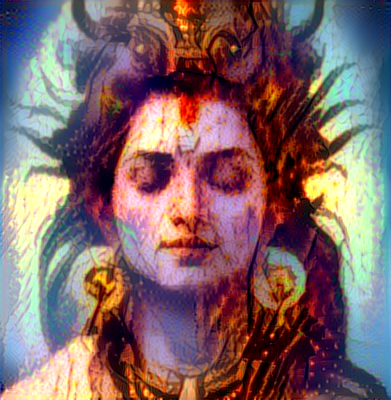

In [ ]:
display(Image(result_prefix + "_at_iteration_4000.png"))